# BANK CHURN PREDICTION

There are two objectives that I aim to achieve:
1. on the one hand, being able to identify the factors that make a bank customer churn (or not),
2. and on the other hand, to find the best model that predicts which customers are likely to churn.

Consequently, in this work I will focus on:
1. the interpretation of the data, in order to find the largest number of insights that explain the reason why a client may or may not leave the bank. For this reason, in the first part of the work I will make an exhaustive exploratory data analysis of each one of the variables and the relation between them.
2. the prediction, to estimate which customers are going to leave and which are not.

In this dataset there is a target variable, "Exited", which when it's equal to 0, it indicates that the client did not churn and when it's equal to 1, it indicates that he left the company (he or she churned). The rest of the variables give information about the client (country of residence, gender, age, estimated salary, etc).

It is a supervised model (the target variable is known) and it is of the classification type.

# Import the libraries

In [1]:
#Data treatment
import pandas as pd
from pandas import DataFrame
import numpy as np

#Warnings configuration
import warnings
warnings.filterwarnings('ignore')

#Pandas profiling
import pandas_profiling as ppf
from pandas_profiling import ProfileReport

#Graphs
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import distplot
from matplotlib.ticker import FormatStrFormatter
sns.set()
%matplotlib inline
import plotly.express as px
from IPython.display import Image  
import pydotplus

#Preprocessing
import sklearn
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

#Modeling
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

# 1. Data overview

In [2]:
raw_data=pd.read_csv('bank churn.csv')
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None
#display(raw_data)

In [3]:
#I first make a copy of the original dataset, to always have it "raw". This way, I will always work on the copy
df=raw_data.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 1.1 Dataset characteristics

In [4]:
#Size
print('The dataset has ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns.')

The dataset has 10000 rows and 14 columns.


In [5]:
#Types of data
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
#Check if there are missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There is not non-null data, all fields are complete.

In [7]:
#Number of records
df.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In total, every column has 10,000 records, each representing a different customer.

In [8]:
#Check how many unique values there are
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

The features 'RowNumber' and 'CustomerId' have as many unique values as registers in the table.

In [9]:
#Check for duplicate data
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [10]:
#See the dataset in more detail
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Dataset content
In total there are 10,000 records and 14 columns, and there are no missing values (all fields are complete) and no duplicates.\
The features are the following:
* RowNumber: index that comes with the dataset, so it can be deleted. It is of type int64.
* CustomerId: it is an internal number to identify a customer, it does not influence in whether the customer churns or not. It is of type int64.
* Surname: nor does it influence the customer's decision to leave the bank or not. It is of type object.
* CreditScore: is a customer's credit score. It can be used to predict whether a client is going to churn or not, since it is likely that the higher the score, the more intentions they have of continuing to be a customer. This variable is of type int64.
* Geography: where the client lives can influence their decision to remain a client or not. It is of type object.
* Gender: although it shouldn't, the customer's gender can influence their decision to leave the bank. It is of type object.
* Age: this is a relevant attribute, since it is likely that the older the customer, the more reluctant to change then bank. This variable is of type int64.
* Tenure: it is also a relevant feature, since it indicates the number of years that the person has been a bank customer, and in this sense, the more years he or she has been a bank customer, the less likely he or she wants to go to another bank. It is of type int64.
* Balance: it may be another important feature to predict whether or not a customer will churn, since people with more money in the bank account are less likely to change banks. It is of type float64.
* NumOfProducts: it indicates the number of bank products that the customer has. It could also be a good indicator for prediction. It is of type int64.
* HasCrCard: it indicates whether a customer has a credit card or not. This variable is also a good indicator for prediction, since it is less likely that a customer will chrun if they have at least one credit card from the bank. It is of type int64.
* IsActiveMember: it may be another relevant feature in the model, since one could say that the most active clients are less likely to leave the bank. It is of type int64.
* EstimatedSalary: it is an important feature when it comes to predicting whether a customer will churn or not, since people with higher salaries are more likely to remain customers. It is of type float64.
* Exited: is the target variable, and indicates whether or not a customer churned. It is of type int64. It is a variable that is also categorical, it can take the value of 1 (the client churned) or 0 (he or she is still a client).

# 2. Some quick cleaning of the dataset

In [11]:
#I remove the columns that are not useful for the analysis: 'RowNumber','CustomerId','Surname'
#axis=1 search by column (axis=0 search by row)
#inplace=True removes columns from the dataset permanently
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace= True)

##### Some characteristics of this new dataset:

In [12]:
#Final dataset size
print('The final dataset has ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns.')

The final dataset has 10000 rows and 11 columns.


In [13]:
#Types of data
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

##### Pandas profiling

In [14]:
#profile=df.profile_report(title='Pandas profile') 
#profile.to_file("Pandas profile.html")

Overall characteristics of the features and results of pandas profiling:
1. There are 11 features and 10.000 observations
2. There are no missing values in any feature
3. There are no duplicated values
4. There are three categorical variables: 'Geography' and 'Gender', the rest are numeric variables
2. Of all the numeric variables, there are three that are actually categorical: 'HasCrCard', 'IsActiveMember' and 'Exited'
3. Within the numeric variables, there is one that is discrete: 'NumOfProducts'

### 2.1 Dataset description

In [15]:
stats_df=df.describe(include='all')
stats_df.loc['Max-Min']=stats_df.loc['max']-stats_df.loc['min']
out_fields=['mean','25%','50%','75%','Max-Min']
stats_de=stats_df.loc[out_fields]
stats_df.rename({'50%':'median'},inplace=True)
stats_df.round(0).T

,count,unique,top,freq,mean,std,min,25%,median,75%,max,Max-Min
CreditScore,10000.0,NaN,NaN,NaN,651.0,97.0,350.0,584.0,652.0,718.0,850.0,500.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,39.0,10.0,18.0,32.0,37.0,44.0,92.0,74.0
Tenure,10000.0,NaN,NaN,NaN,5.0,3.0,0.0,3.0,5.0,7.0,10.0,10.0
Balance,10000.0,NaN,NaN,NaN,76486.0,62397.0,0.0,0.0,97199.0,127644.0,250898.0,250898.0
NumOfProducts,10000.0,NaN,NaN,NaN,2.0,1.0,1.0,1.0,1.0,2.0,4.0,3.0
HasCrCard,10000.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
IsActiveMember,10000.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
EstimatedSalary,10000.0,NaN,NaN,NaN,100090.0,57510.0,12.0,51002.0,100194.0,149388.0,199992.0,199981.0


In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
#Let's check if there are clientes who have churned and still have money in their accounts
print('Mean:',df.groupby('Exited')['Balance'].mean().round(0))
print('')
print('Sum:',df.groupby('Exited')['Balance'].sum().round(0))
print('')
print('Count:',df.groupby('Exited')['Balance'].count().round(0))

Mean: Exited
0    72745.0
1    91109.0
Name: Balance, dtype: float64

Sum: Exited
0    579270798.0
1    185588095.0
Name: Balance, dtype: float64

Count: Exited
0    7963
1    2037
Name: Balance, dtype: int64


In [18]:
#Let's check if there are customers that churned, and still have money in their accounts.
df[df['Balance']!=0].groupby('Exited').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,652.820264,37.418696,4.981634,119535.864270,1.360710,0.699752,0.561907,100512.654439
1,645.836044,44.806766,4.973325,120746.971132,1.465843,0.697463,0.361093,101362.745940


In [19]:
#Now, let's check if there are clientes who have churned and still have products
print('Mean:',df.groupby('Exited')['NumOfProducts'].mean().round(0))
print('')
print('Sum:',df.groupby('Exited')['NumOfProducts'].sum().round(0))
print('')
print('Count:',df.groupby('Exited')['NumOfProducts'].count().round(0))

Mean: Exited
0    2.0
1    1.0
Name: NumOfProducts, dtype: float64

Sum: Exited
0    12297
1     3005
Name: NumOfProducts, dtype: int64

Count: Exited
0    7963
1    2037
Name: NumOfProducts, dtype: int64


##### Some insights:
1. No column with date data is indicated in the dataset, so it cannot be concluded that the data is from a specific day or the average of a month, or some other date. As a consequence, for example, as the balance is for a given date, that gives a lot of questions: 1. what date is it, 2. of what relevance is this date, 3. is it an average of a month or an specific date.
2. There are clients who have churned, but still have money deposited in the account. That could probably mean that they are going to retire that amount of money (185 millons, that represents almost the 25% of all the money deposited in the bank).
3. The same thing happens with the number of products: there are customers who still have products in the bank, but who are no longer customers. Will be deactivated soon?
4. What does being an active member mean?

# 3. EDA

From the pandas profiling report I can have a quick look at the distribution of each feature:
* CreditScore: it has a slight negative skew, almost next to 0, and slight negative kurtosis. The mean is 650, the median is 652 and the minumum and maximum values are 350 and 850.
* Geography: it has three distinct values (France, Germany and Spain). It has no zero values and the maximum and minimum are reasonable numbers.
* Gender: it has two distinct values (male or female)
* Age: it has a positive skew, almost next to 0, and positive kurtosis. It has no zero values and the minimum value is 18 years old (which is reasonable), with 22 clients, and the maximum is 92 years old, with only 2 clients. The mean is 39 years old and the mean is 37 years old.
* Tenure: there are 11 diferent possible values, from zero to 10. There are several clientes with zero tenure (4% of the total), I guess it's measured in years, where zero means zero years, but could be por example, 10 months. And the maximum tenure is 10 years. Though this calls my attention (why aren't there clients with more tenure than 10 years?), I guess this is because it's a relatively new bank.
* Balance: what calls my atention is the large number of clients with zero money in their accounts (36%). The mean of this feature is 76k and the median 97k. It has a slight negative skew (-0.14), and a negative kurtosis.
* NumOfProducts: there are 4 possible values, which means the bank offers only 4 products. 50% of the clients have just one product and 45% have 2 products.
* HasCrCard: most of the clients have a credit card (71%).
* IsActiveMember: 52% is active.
* EstimatedSalary: it has a very slight positive skew, almost next to 0, and negative kurtosis. The mean and the median is 100k. The minimum value is 12, which is weird and the maximum is almost 200k.

## 3.1 Univariate analysis

In this section we will try to detect the nature of the distribution of the statistical series of all the features of the dataset. Having knowledge of the distribution is important to have a good understanding of the features involved in the model and for the estimation of the parameter models that is carried out later.

### 3.1.1 Analysis of the features that are object/categorical type

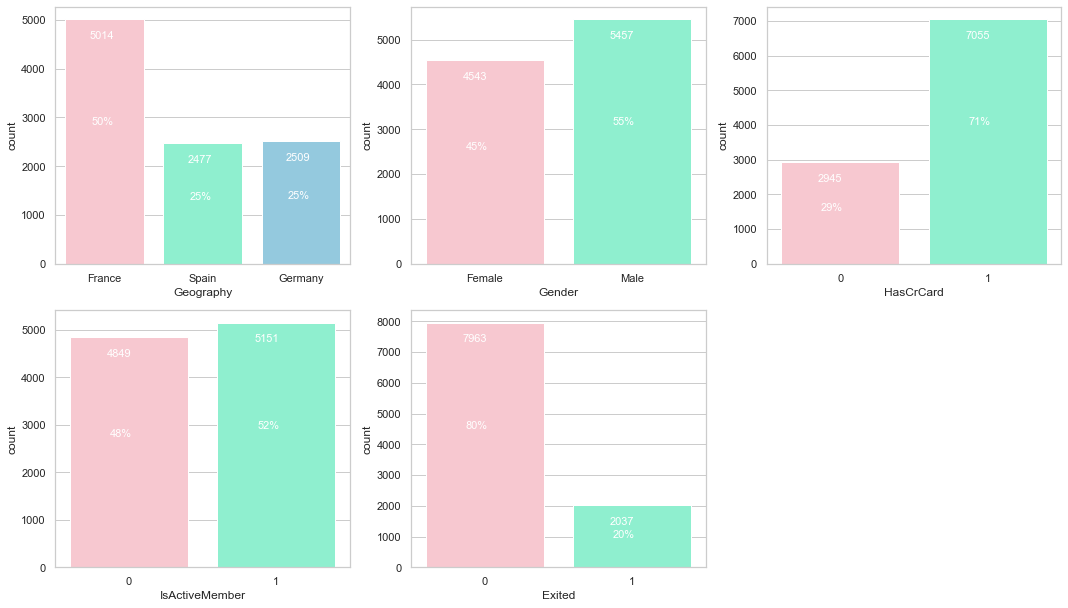

In [20]:
categorical_var=['Geography','Gender','HasCrCard','IsActiveMember','Exited']
columns=df[categorical_var].columns.tolist()

plt.figure(figsize=(15,25))
sns.set_theme(style="whitegrid")
sns.set_palette(["pink", "aquamarine","skyblue","lightyellow"])

for i,categorical_var in enumerate(columns):
    plt.subplot(6, 3, i + 1)
    order=df[categorical_var].value_counts(ascending=False).index
    ax=sns.countplot(df[categorical_var])
    
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.25, p.get_height()), va='top', color='white', size=11)
        percentage = '{:.0f}%'.format(100 * p.get_height()/len(df[categorical_var]))
        x = p.get_x()+0.27
        y = p.get_height()*0.6
        plt.annotate(percentage, (x, y),va='top', color='white', size=11)
    
    plt.tight_layout()
    
plt.show()

About 20% of the customers have churned.\
As the target feature is 'Exited', the baseline model could be to predict that 20% of the customers will churn. Given that 20% is a small number (it's an unbalanced dataset), we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

In [21]:
print('Some insights:')
for i,categorical_var in enumerate(columns):
    print("\n",categorical_var)
    tot_count = df[categorical_var].count().sum()
    tot_count
    for i,v in df[categorical_var].value_counts().items():
        print("-",i,": there are",v,"clients, which represents the",round((v/tot_count)*100) ,"% of the total")

Some insights:

 Geography
- France : there are 5014 clients, which represents the 50 % of the total
- Germany : there are 2509 clients, which represents the 25 % of the total
- Spain : there are 2477 clients, which represents the 25 % of the total

 Gender
- Male : there are 5457 clients, which represents the 55 % of the total
- Female : there are 4543 clients, which represents the 45 % of the total

 HasCrCard
- 1 : there are 7055 clients, which represents the 71 % of the total
- 0 : there are 2945 clients, which represents the 29 % of the total

 IsActiveMember
- 1 : there are 5151 clients, which represents the 52 % of the total
- 0 : there are 4849 clients, which represents the 48 % of the total

 Exited
- 0 : there are 7963 clients, which represents the 80 % of the total
- 1 : there are 2037 clients, which represents the 20 % of the total


### 3.1.2 Analysis of the features that are of the numerical type

In [22]:
#Define a function for the graphs that I am going to use later
def combined_graph (data, 
                    feature, 
                    figsize=(12, 8), 
                    kde=False, bins=None):
    
    sns.set_theme(style="whitegrid")
    fig,(ax_box, ax_hist, ax_hist2)=plt.subplots(nrows=3,
                                                 sharex=True,
                                                 figsize=figsize)
    sns.boxplot(data=data, 
                x=feature, 
                ax=ax_box, 
                showmeans=True, 
                color="pink",
                linewidth=1)
    
    sns.histplot(data=data, 
                 x=feature, 
                 kde=True, 
                 ax=ax_hist, 
                 color='deepskyblue', 
                 bins=60)
    
    sns.histplot(data=data, 
                 x=feature, 
                 ax=ax_hist2, 
                 color='aquamarine', 
                 bins=50, 
                 cumulative=True, 
                 stat='probability')

#### CreditScore

Feature: CreditScore

Brief statistical description:

count    10000.0
mean       650.5
std         96.7
min        350.0
25%        584.0
50%        652.0
75%        718.0
max        850.0
Name: CreditScore, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature CreditScore are: 584.0 652.0 718.0
Having iqr defined as: q75-q25, for the feature CreditScore the iqr is: 134.0

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: 383.0 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 919.0

Counting outliers below the minimun:
350    5
376    2
382    1
367    1
373    1
358    1
359    1
363    1
365    1
351    1
dtype: int64

Counting outliers above the maximun:
Series([], dtype: int64)

Graphs:


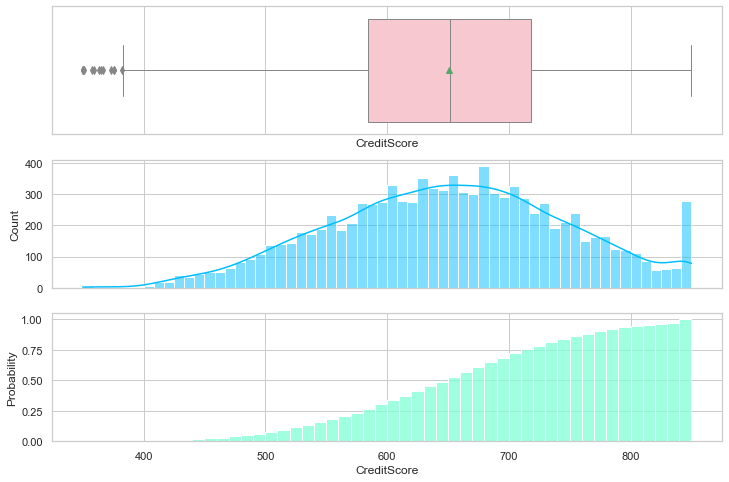

Skew: -0.07159586676212397
Kurtosis (excess kurtosis): -0.42611279176518124


In [23]:
#Feature to analize
feature='CreditScore'

print("Feature:",feature)
describe=df[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df[feature] if m < min])

#Counting them
count_min=[m for m in df[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df[feature]))

* It has a negative skew and kurtosis, which indicates that the distribution is non-normal.
* Although the formula to detect outliers shows some values that are outside the established limits, they are reasonable values, and represent a low percentage of the total data, so I keep them.

In [24]:
df.loc[df['CreditScore']<=383,['Exited']].sort_values(ascending=False, by="Exited")

,Exited
7,1
942,1
1193,1
1405,1
1631,1
1838,1
1962,1
2473,1
2579,1
5494,1


All the customers that have the lowest credit scores, have churned.

#### Age

Feature: Age

Brief statistical description:

count    10000.0
mean        38.9
std         10.5
min         18.0
25%         32.0
50%         37.0
75%         44.0
max         92.0
Name: Age, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature Age are: 32.0 37.0 44.0
Having iqr defined as: q75-q25, for the feature Age the iqr is: 12.0

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: 14.0 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 62.0

Counting outliers below the minimun:
Series([], dtype: int64)

Counting outliers above the maximun:
63    40
67    37
64    37
66    35
71    27
69    22
72    21
68    19
65    18
70    18
74    18
73    13
76    11
77    10
75     9
78     5
79     4
81     4
80     3
84     2
92     2
82     1
83     1
85     1
88     1
dtype: int64

Graphs:


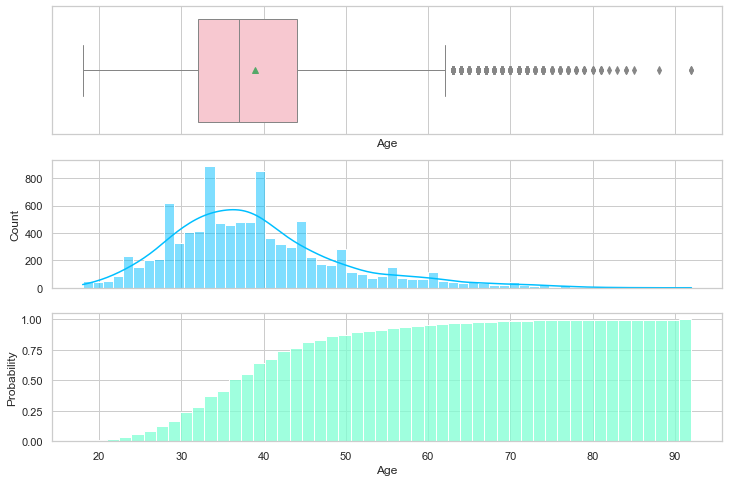

Skew: 1.0111685586628079
Kurtosis (excess kurtosis): 1.3940495456392599


In [25]:
#Feature to analize
feature='Age'

print("Feature:",feature)
describe=df[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df[feature] if m < min])

#Counting them
count_min=[m for m in df[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df[feature]))

* 75% of the clients are under 44 years old, and most of them are between 30 and 40 years old.
* It has positive skew and kurtosis
* This feature shows outliers, but all of them seem like natural outliers that came from the population. The extreme values are above 62 years, but none of them are unreasonable numbers (there's no one, for example, with the age of 100, which could be suspicious).

In [26]:
#Let's check how many custormers, older than 62 years, are still clients
df.loc[(df['Age']>62) & (df['Exited']==0),['Exited']].count()

Exited    286
dtype: int64

In [27]:
#And now, how many of them have churned
df.loc[(df['Age']>62) & (df['Exited']==1),['Exited']].count()

Exited    73
dtype: int64

So, not all the outliers in the feature age are custumers that have churned

#### Tenure

Feature: Tenure

Brief statistical description:

count    10000.0
mean         5.0
std          2.9
min          0.0
25%          3.0
50%          5.0
75%          7.0
max         10.0
Name: Tenure, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature Tenure are: 3.0 5.0 7.0
Having iqr defined as: q75-q25, for the feature Tenure the iqr is: 4.0

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: -3.0 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 13.0

Counting outliers below the minimun:
Series([], dtype: int64)

Counting outliers above the maximun:
Series([], dtype: int64)

Graphs:


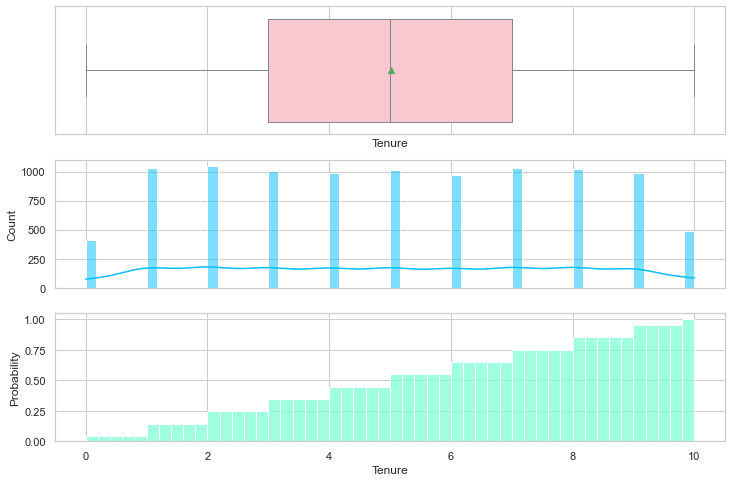

Skew: 0.010989809189781041
Kurtosis (excess kurtosis): -1.1652426364413717


In [28]:
#Feature to analize
feature='Tenure'

print("Feature:",feature)
describe=df[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df[feature] if m < min])

#Counting them
count_min=[m for m in df[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df[feature]))

* It has a relatively even distribution, with the same number of clients for each year of seniority.
* There are no oultliers.
* It has a slight positive skew and a negative kurtosis.

#### Balance

Feature: Balance

Brief statistical description:

count     10000.0
mean      76485.9
std       62397.4
min           0.0
25%           0.0
50%       97198.5
75%      127644.2
max      250898.1
Name: Balance, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature Balance are: 0.0 97198.54000000001 127644.24
Having iqr defined as: q75-q25, for the feature Balance the iqr is: 127644.24

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: -191466.36000000002 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 319110.60000000003

Counting outliers below the minimun:
Series([], dtype: int64)

Counting outliers above the maximun:
Series([], dtype: int64)

Graphs:


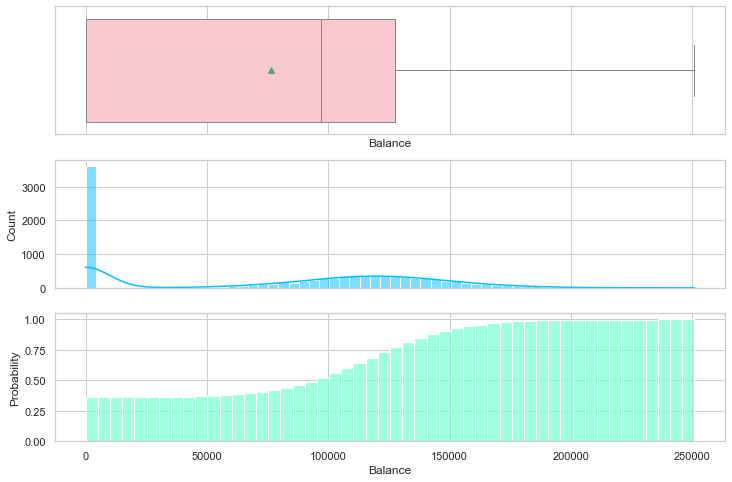

Skew: -0.14108754375291138
Kurtosis (excess kurtosis): -1.489267106315331


In [29]:
#Feature to analize
feature='Balance'

print("Feature:",feature)
describe=df[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df[feature] if m < min])

#Counting them
count_min=[m for m in df[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df[feature]))

* Almost 35% of the customers have no money in their account.
* It has a negative skew and a high negative kurtosis.
* There are no outliers.

In [30]:
#Let's check how many custormers with no money in their accounts are still clients
df.loc[(df['Balance']==0) & (df['Exited']==0),['Exited']].count()

Exited    3117
dtype: int64

In [31]:
#And how many are not
df.loc[(df['Balance']==0) & (df['Exited']==1),['Exited']].count()

Exited    500
dtype: int64

#### Estimated Salary

Feature: EstimatedSalary

Brief statistical description:

count     10000.0
mean     100090.2
std       57510.5
min          11.6
25%       51002.1
50%      100193.9
75%      149388.2
max      199992.5
Name: EstimatedSalary, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature EstimatedSalary are: 51002.11 100193.915 149388.2475
Having iqr defined as: q75-q25, for the feature EstimatedSalary the iqr is: 98386.1375

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: -96577.09624999999 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 296967.45375

Counting outliers below the minimun:
Series([], dtype: int64)

Counting outliers above the maximun:
Series([], dtype: int64)

Graphs:


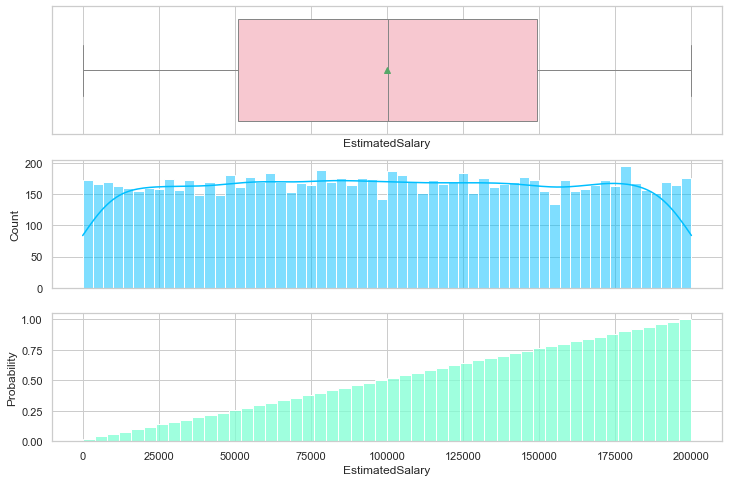

Skew: 0.0020850448448748848
Kurtosis (excess kurtosis): -1.181527710874237


In [32]:
#Feature to analize
feature='EstimatedSalary'

print("Feature:",feature)
describe=df[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df[feature] if m < min])

#Counting them
count_min=[m for m in df[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df[feature]))

* The skew is almost 0 and kurtosis is negative
* There are no outliers.
* There are customers who have very low estimated salary... this can be a mistake in the dataset

In [33]:
#Let's check how many custormers have an estimated salary below 5000, which means 416 dollars a month
df.loc[df['EstimatedSalary']<5000,'Exited'].count()

264

I won't drop them because I don't know anything about this feature, I guess it represents annual salary... but I'm not sure, so I'll leave it that way.

####  NumOfProducts

Feature: NumOfProducts

Brief statistical description:

count    10000.0
mean         1.5
std          0.6
min          1.0
25%          1.0
50%          1.0
75%          2.0
max          4.0
Name: NumOfProducts, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature NumOfProducts are: 1.0 1.0 2.0
Having iqr defined as: q75-q25, for the feature NumOfProducts the iqr is: 1.0

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: -0.5 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 3.5

Counting outliers below the minimun:
Series([], dtype: int64)

Counting outliers above the maximun:
4    60
dtype: int64

Graphs:


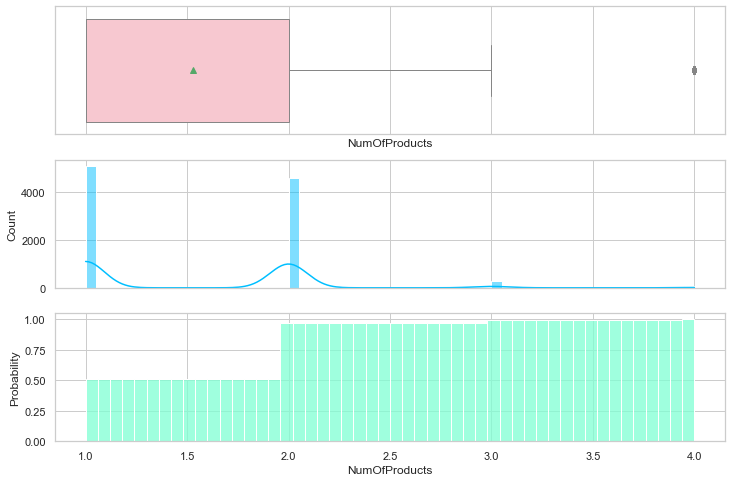

Skew: 0.745456048438949
Kurtosis (excess kurtosis): 0.5820893733639854


In [34]:
#Feature to analize
feature='NumOfProducts'

print("Feature:",feature)
describe=df[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df[feature] if m < min])

#Counting them
count_min=[m for m in df[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df[feature]))

* Most of the customers have at least one or two products. 
* Very few customers have more than two products.
* There are no outliers.

In [35]:
#Let's check how many custormers have 3 or 4 products
df.loc[df['NumOfProducts']>2,'Exited'].count()

326

## 3.2 Bivariate analysis
Bivariate analysis allows us to achieve a more precise characterization of the problem that is being developed.
### 3.2.1 Correlation
The correlation coefficient allows to obtain relevant information on the degree of linear association between two variables.\
It should be noted that it does not necessarily show a cause-effect relationship.

In [36]:
correlation=df.corr(method="pearson")
correlation

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


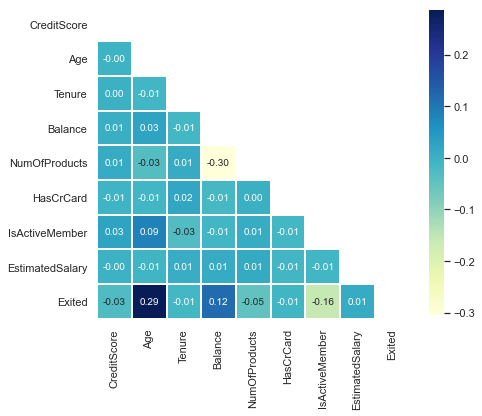

In [37]:
#Heatmap
plt.figure(figsize=(7,7))
sns.set_theme(style="whitegrid") 

mask = np.triu(np.ones_like(df.corr(),dtype = bool))

sns.heatmap(correlation, 
            cbar=True, 
            square=True, 
            annot=True,
            linecolor='white',
            linewidths=1,
            fmt='.2f',
            annot_kws={'size': 10},
            cbar_kws={"shrink": 0.8},
            mask=mask,
            cmap="YlGnBu") 

#Roto los ejes
plt.xticks(rotation = 90)

plt.show()

In [38]:
#Let's see the correlation with the target, ordered by the biggest one to the smallest (in absolute values) 
features=list(df.columns[:-1])  # everything except "Exited"
Exited=df['Exited']
correlations=df[features].corrwith(Exited).round(2)
correlations=abs(correlations)
correlations.sort_values(inplace=True,ascending=False)
correlations

Age                0.29
IsActiveMember     0.16
Balance            0.12
NumOfProducts      0.05
CreditScore        0.03
Tenure             0.01
HasCrCard          0.01
EstimatedSalary    0.01
dtype: float64

Some insights:
1. There is no strong correlation between the variables (except for balance and number of products, that have a negative correlation (-0.3)).
2. Age is the variable that has the highest correlation with the target variable. This correlation is positive, which indicates that when age increases, the churn rate also increases.
3. The next features with a relatively high correlation with 'Exited' are IsActiveMember and Balance. The first has a negative correlation, that is, the more active the customer, the less churn rate. The second one has a positive correlation, which indicates that the higher the amount of money in the account, the higher the churn rate.
4. The variables 'Tenure', 'HasCrCard' and 'EstimatedSalary' could be removed from the model, as they have no correlation whith the target.

### 3.2.2 We see in detail the relationship of each of the features with the target
#### 3.2.2.1 Numeric features

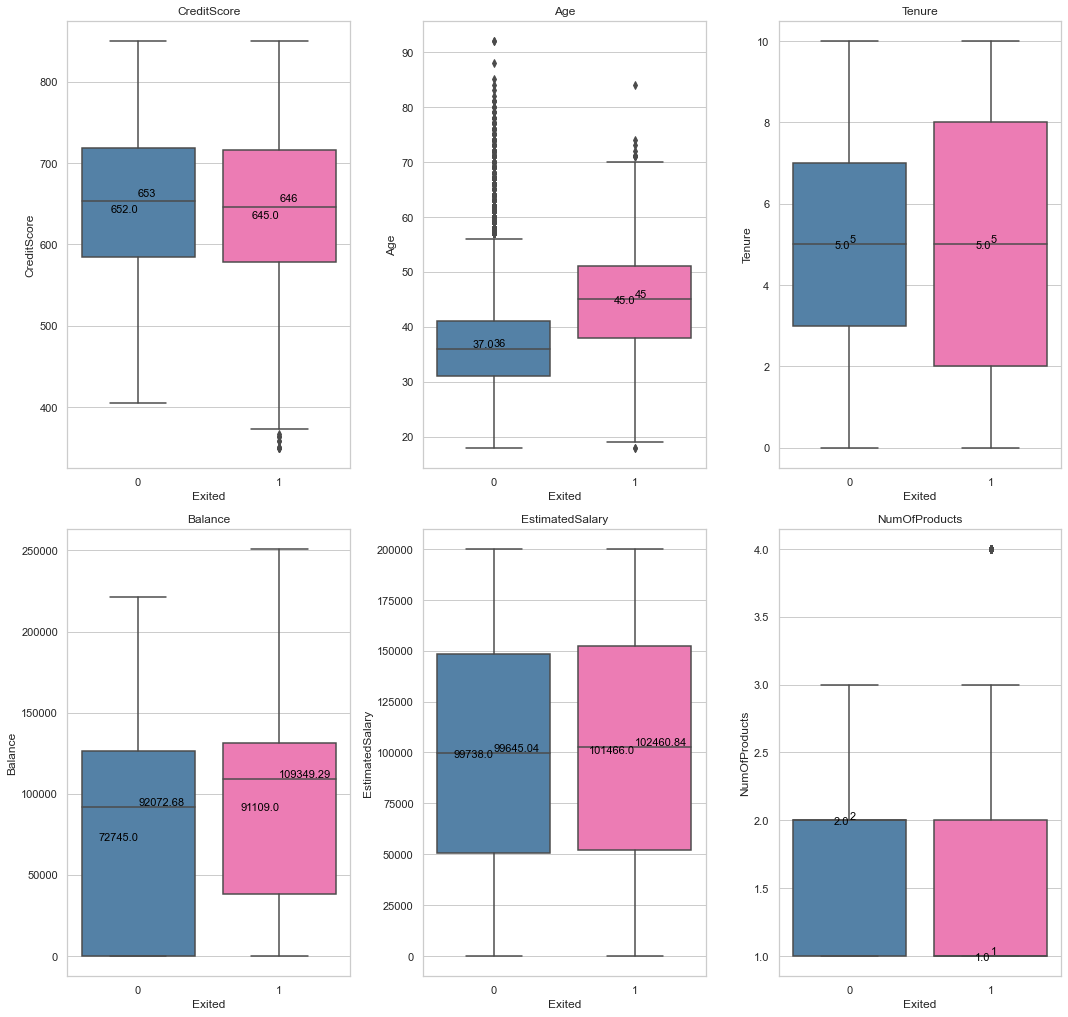

In [39]:
numeric_features=['CreditScore','Age', 'Tenure', 'Balance','EstimatedSalary','NumOfProducts']
columns=df[numeric_features].columns.tolist()

plt.figure(figsize=(15,35))
sns.set_theme(style="whitegrid")

for i,numeric_features in enumerate(columns):
    
    plt.subplot(5, 3, i + 1)
    sns.set_palette(["steelblue", "hotpink"])
    box_plot=sns.boxplot(df['Exited'], df[numeric_features])
    
    median=df.groupby('Exited')[numeric_features].median()
    mean=df.groupby('Exited')[numeric_features].mean().round(0)
    vertical_offset_median=df[numeric_features].median() * 0.01
    vertical_offset_mean=df[numeric_features].mean() *(-0.02)

    for xtick in box_plot.get_xticks():
        box_plot.text(xtick, 
                      median[xtick] + vertical_offset_median, 
                      median[xtick], 
                      horizontalalignment='left', 
                      fontsize=11, 
                      color='black'
                     )
        box_plot.text(xtick, 
                      mean[xtick] + vertical_offset_mean, 
                      mean[xtick],
                      horizontalalignment='right', 
                      fontsize=11, 
                      color='black'
                     )

    
    plt.tight_layout()
    plt.title(numeric_features)

plt.show()

Some insights:
1. In terms of their credit score, there is no difference between the clients who churned and those who didn't.
2. Older customers have a higher churn rate. In this sense, and given that it is the feature with the highest correlation, the bank should take action in this regard: that is, carry out customer retention campaigns according to age groups, focusing especially on those over 40 years of age.
3. Regarding the years of permanence, although the mean and median of the clients who stay and those who leave is the same (5 years in both cases), the clients who churn, do so or more at the beginning, or rather after the 7 years passed. They should also carry out retention campaigns in order to keep their long-standing clients.
4. Customers with larger accounts leave the bank the most. This is an important warning for the bank, since the most important clients are leaving.
5. There are no differences between clients who churn in terms of estimated salary.

In [40]:
print('Some statistics')
for i,numeric_features in enumerate(columns):
    desc=df.groupby('Exited')[numeric_features].describe().round(1)
    print('\n',numeric_features,'\n', desc,'\n')

Some statistics

 CreditScore 
          count   mean    std    min    25%    50%    75%    max
Exited                                                         
0       7963.0  651.9   95.7  405.0  585.0  653.0  718.0  850.0
1       2037.0  645.4  100.3  350.0  578.0  646.0  716.0  850.0 


 Age 
          count  mean   std   min   25%   50%   75%   max
Exited                                                  
0       7963.0  37.4  10.1  18.0  31.0  36.0  41.0  92.0
1       2037.0  44.8   9.8  18.0  38.0  45.0  51.0  84.0 


 Tenure 
          count  mean  std  min  25%  50%  75%   max
Exited                                             
0       7963.0   5.0  2.9  0.0  3.0  5.0  7.0  10.0
1       2037.0   4.9  2.9  0.0  2.0  5.0  8.0  10.0 


 Balance 
          count     mean      std  min      25%       50%       75%       max
Exited                                                                      
0       7963.0  72745.3  62848.0  0.0      0.0   92072.7  126410.3  221532.8
1       

Some insights:
* Credit Score: the reason why a customer churn is not given by the credit score, as the mean and extreme values are almost the same for each group.
* Age: the customers that churned are a little bit older than the ones who doesn't.
* Balance: customers that churned have, in average, more money in their accounts than the ones who didn't churn.
* Estimated Salary: customers that churned have, in average, higher salaries than the ones who didn't churn.

##### I take a look in more detail the two features that caught my attention the most

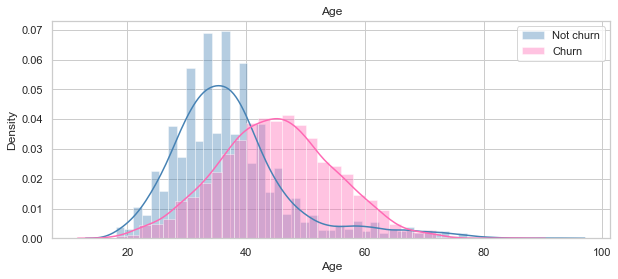

In [41]:
#Age
plt.figure(figsize=(10,4))
sns.distplot(df[df['Exited'] == 0]['Age'], color="steelblue", label='Not churn')
sns.distplot(df[df["Exited"] == 1]['Age'], color="hotpink", label='Churn')
plt.legend()
plt.title("Age")
plt.show()

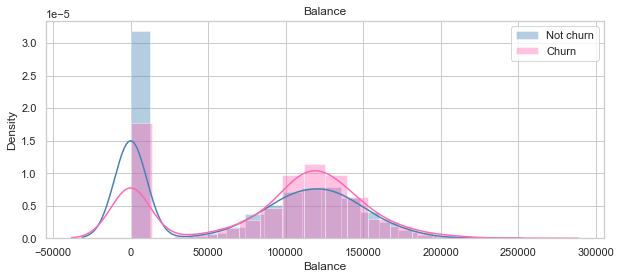

In [42]:
#Balance
plt.figure(figsize=(10,4))
sns.distplot(df[df['Exited'] == 0]['Balance'], color="steelblue", label='Not churn')
sns.distplot(df[df["Exited"] == 1]['Balance'], color="hotpink", label='Churn')
plt.legend()
plt.title("Balance")
plt.show()

#### 3.2.2.2 Categorical features

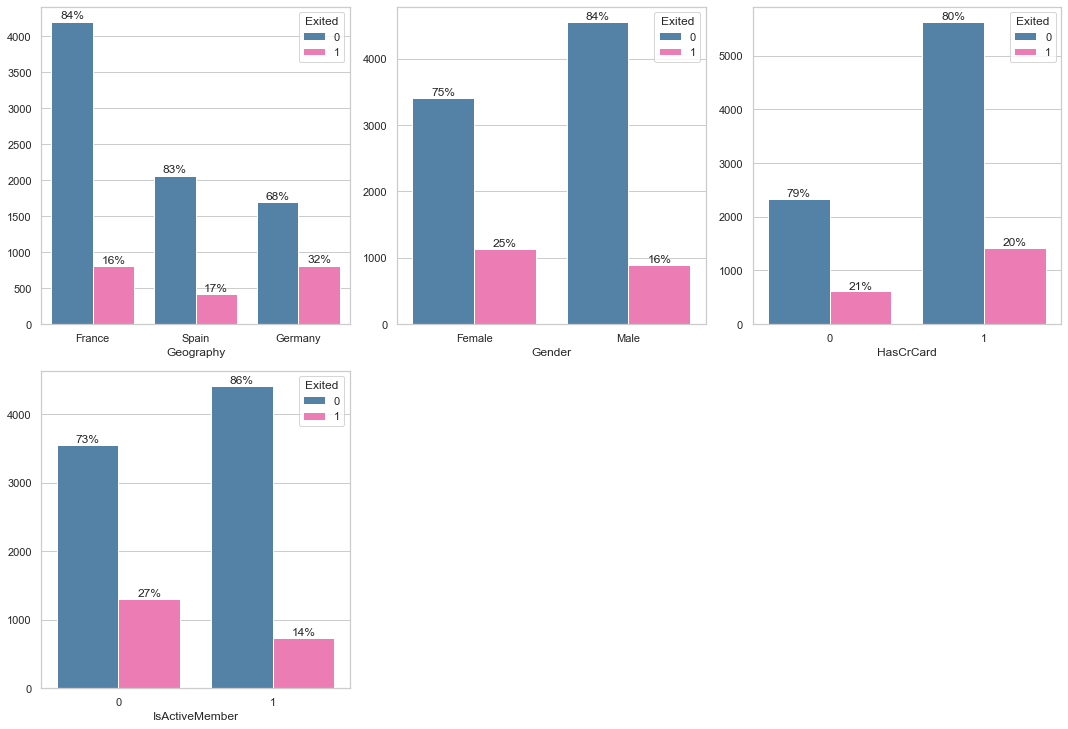

In [43]:
cat_features=['Geography','Gender','HasCrCard','IsActiveMember']
columns=df[cat_features].columns.tolist()

plt.figure(figsize=(15,25))
sns.set_theme(style="whitegrid")

for i, cat_features in enumerate(columns):
    
    plt.subplot(5, 3, i + 1)
    sns.set_palette(["steelblue", "hotpink"])

    ax=sns.countplot(df[cat_features], hue=df['Exited'], data=df)

    ax.set_ylabel('')
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

    plt.tight_layout()

plt.show()

Some insights:
1. While the largest number of clients come from France, the largest number of customers who churn are from Germany.
2. Women churn in a greater proportion than men.
3. Whether or not they have a card does not change the proportion of customers who churn (it is 20% in both cases). However, in absolute terms, more customers who have a credit card left the bank.
4. A more active member is less likely to churn than a less active one.

## 3.3 Multivariate analysis

I first analyze, whith a pairplot, the relationship between two variables of the dataset, depending on whether the client churned or not. In this way, different groups can be identified, if they exist, or it can be used to find some relationship between the different variables.

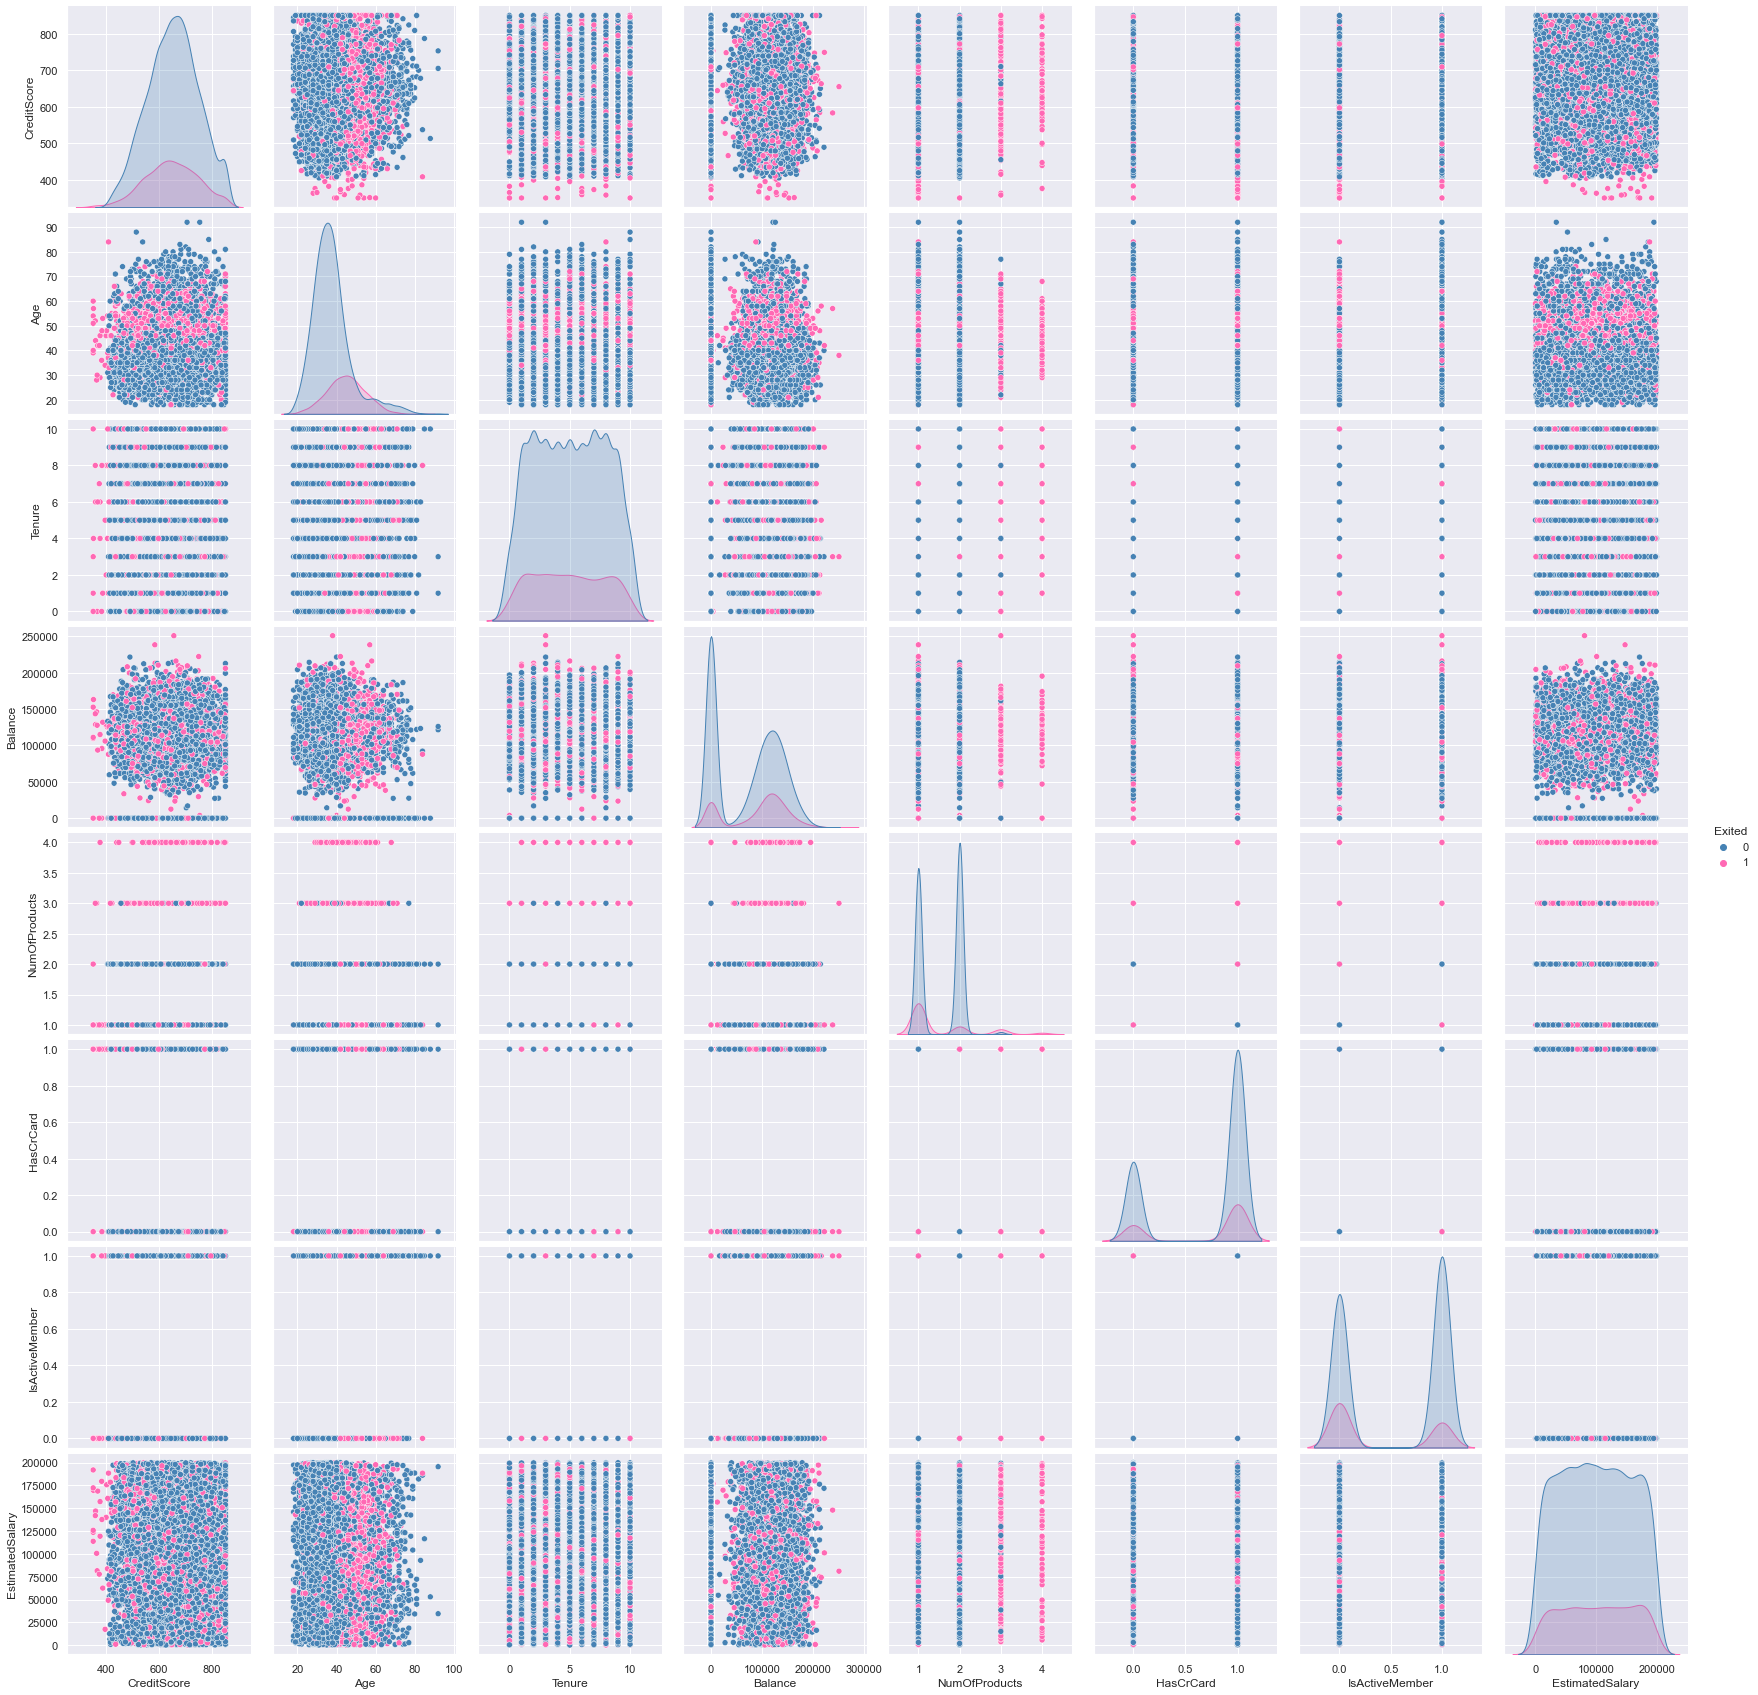

In [44]:
sns.set_theme(style="darkgrid")
sns.set_palette(["steelblue", "hotpink"])
sns.pairplot(df,hue='Exited', size=3)

Some insights:
* Regarding to whether the client has churned or not, the variable in which the most groups (although not very marked) can be found, are those that show the relationship between age and the following variables: Credit Score, Tenure, Balance and Estimated Salary. In all cases, the clients who churned are those between 45 and 60 years old, regardless of their credit score, how much money they have in the account, what their estimated salary is and how many years they have been clients.

I look in a little more detail at those relationships

CreditScore


<Figure size 500x400 with 0 Axes>

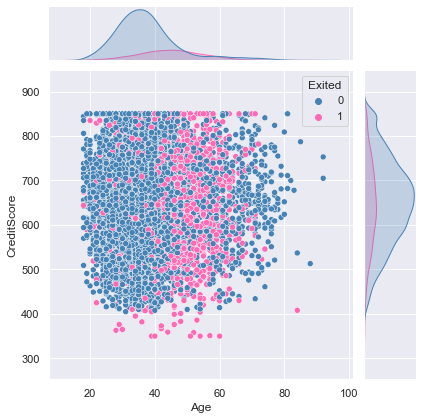

Tenure


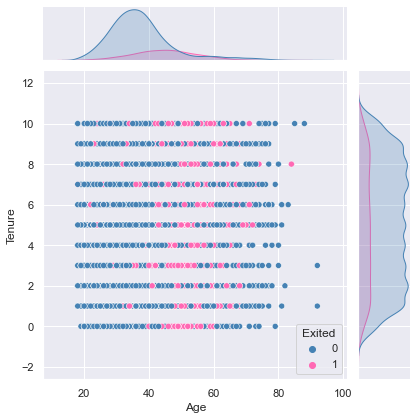

Balance


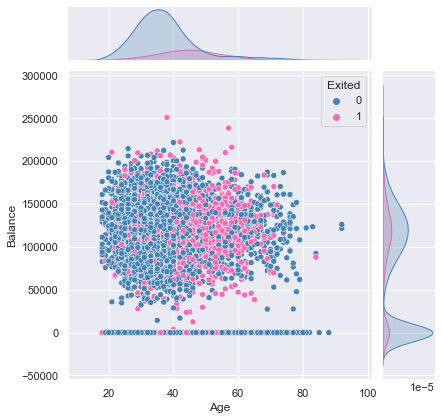

EstimatedSalary


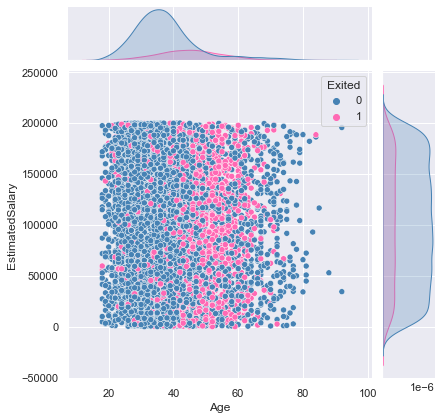

In [45]:
detail=['CreditScore','Tenure','Balance','EstimatedSalary']
col=df[detail].columns.tolist()

plt.figure(dpi = 100, figsize = (5,4))

for i in col:
    print(i)
    sns.jointplot(x='Age',y=i, data=df, hue='Exited')
    plt.show()

# 4. Feature engineer
### 4.1 Dummy variables
I transform the features that are of the categorical type into dummy type variables to be able to work with them in the prediction model

In [46]:
#The categoric features that are going to be transformed in dummies variables are: 'Geography' y 'Gender'. 
#The features 'HasCrCard' and 'IsActiveMember' are already of the type of 0 and 1.

#Gender
df['Gender']=pd.get_dummies(df['Gender'], drop_first=True)

#Geography
Geography_dumies=pd.get_dummies(df['Geography'], drop_first=True)
df=df.drop(columns=['Geography'])

#Dataset with dummies
df_dummies=pd.concat([df,Geography_dumies],axis=1)

#I take a look at the dataset
df_dummies.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
5,645,1,44,8,113755.78,2,1,0,149756.71,1,0,1
6,822,1,50,7,0.00,2,1,1,10062.80,0,0,0
7,376,0,29,4,115046.74,4,1,0,119346.88,1,1,0
8,501,1,44,4,142051.07,2,0,1,74940.50,0,0,0
9,684,1,27,2,134603.88,1,1,1,71725.73,0,0,0


### 4.2 Create some new features
I'll create some new features that are likely to have an impact on the probability of churning, given the correlation between them.

##### 4.2.1 Tenure by age

Feature: TenureByAge

Brief statistical description:

count    10000.0
mean         0.1
std          0.1
min          0.0
25%          0.1
50%          0.1
75%          0.2
max          0.6
Name: TenureByAge, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature TenureByAge are: 0.06451612903225806 0.12903225806451613 0.2
Having iqr defined as: q75-q25, for the feature TenureByAge the iqr is: 0.13548387096774195

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: -0.13870967741935486 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 0.40322580645161293

Counting outliers below the minimun:
Series([], dtype: int64)

Counting outliers above the maximun:
0.434783    10
0.416667     8
0.409091     8
0.454545     5
0.428571     4
0.473684     4
0.476190     3
0.450000     3
0.421053     3
0.555556     2
0.500000     2
0.444444     2
dtype: int64

Graphs:


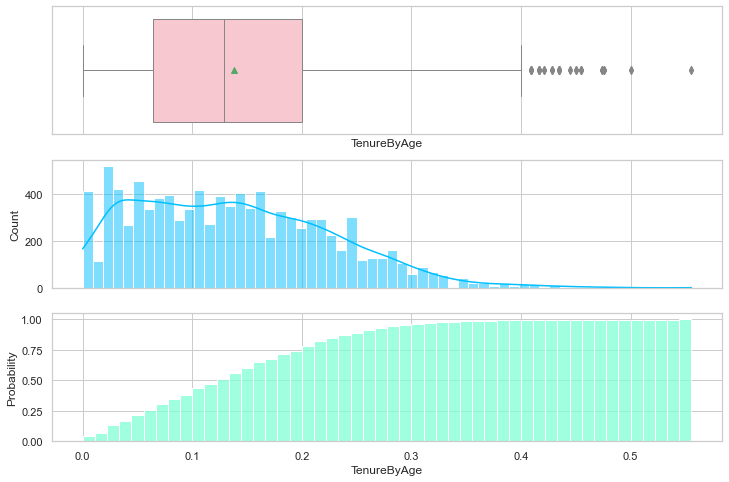

Skew: 0.5660617997625361
Kurtosis (excess kurtosis): -0.04529549666023325


In [47]:
df_dummies['TenureByAge'] = df_dummies.Tenure/df_dummies.Age

#Feature to analize
feature='TenureByAge'

print("Feature:",feature)
describe=df_dummies[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df_dummies[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df_dummies[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df_dummies[feature] if m < min])

#Counting them
count_min=[m for m in df_dummies[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df_dummies[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df_dummies,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df_dummies[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df_dummies[feature]))

<AxesSubplot:xlabel='Exited', ylabel='TenureByAge'>

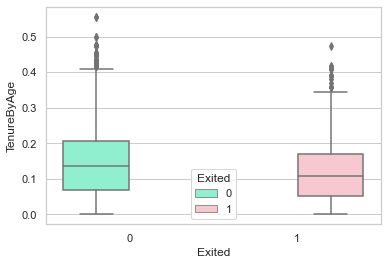

In [48]:
sns.set_theme(style="whitegrid")
sns.set_palette(["aquamarine", "pink"])
sns.boxplot(y='TenureByAge',x='Exited',hue='Exited', data=df_dummies)

* As one can see, the mean of the feature tenure by age is higher in those who didn't churn, which is reasonable.

##### 4.2.2 Credit Score, given age

Feature: CreditScoreGivenAge

Brief statistical description:

count    10000.0
mean        17.9
std          5.4
min          4.9
25%         14.1
50%         17.3
75%         21.0
max         46.9
Name: CreditScoreGivenAge, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature CreditScoreGivenAge are: 14.088888888888889 17.285714285714285 20.96153846153846
Having iqr defined as: q75-q25, for the feature CreditScoreGivenAge the iqr is: 6.872649572649571

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: 3.7799145299145316 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 31.270512820512817

Counting outliers below the minimun:
Series([], dtype: int64)

Counting outliers above the maximun:
31.833333    4
31.481481    4
33.500000    3
38.636364    3
32.000000    3
            ..
38.473684    1
39.000000    1
39.500000    1
32.083333    1
38.545455    1
Length: 171, dtype: int64

Graphs:


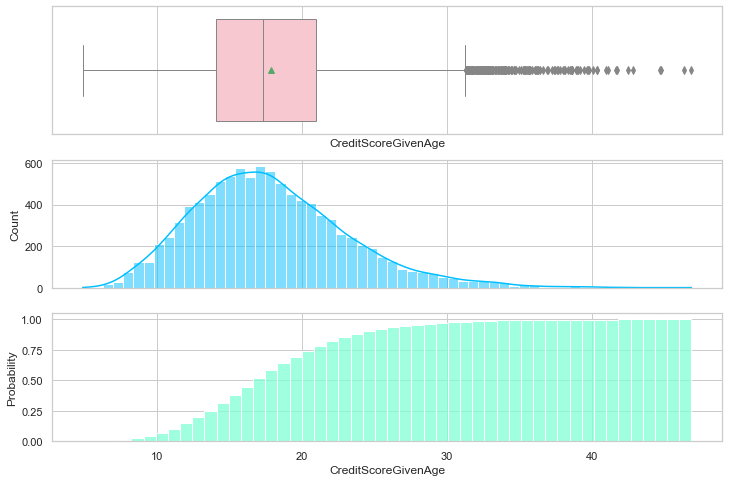

Skew: 0.760402609442056
Kurtosis (excess kurtosis): 1.0217332091010798


In [49]:
df_dummies['CreditScoreGivenAge'] = df_dummies.CreditScore/df_dummies.Age

#Feature to analize
feature='CreditScoreGivenAge'

print("Feature:",feature)
describe=df_dummies[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df_dummies[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df_dummies[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df_dummies[feature] if m < min])

#Counting them
count_min=[m for m in df_dummies[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df_dummies[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df_dummies,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df_dummies[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df_dummies[feature]))

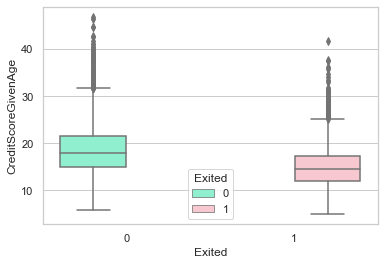

In [50]:
sns.set_theme(style="whitegrid")
sns.set_palette(["aquamarine", "pink"])
sns.boxplot(y='CreditScoreGivenAge',x='Exited',hue='Exited', data=df_dummies);

* The credit score, given the age of the customer, is lower in those who have churned.

##### 4.2.3 Balance, given number of products

Feature: BalanceGivenNumProd

Brief statistical description:

count     10000.0
mean      62819.7
std       56783.3
min           0.0
25%           0.0
50%       61166.2
75%      112654.8
max      238387.6
Name: BalanceGivenNumProd, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature BalanceGivenNumProd are: 0.0 61166.24 112654.83499999999
Having iqr defined as: q75-q25, for the feature BalanceGivenNumProd the iqr is: 112654.83499999999

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: -168982.2525 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 281637.0875

Counting outliers below the minimun:
Series([], dtype: int64)

Counting outliers above the maximun:
Series([], dtype: int64)

Graphs:


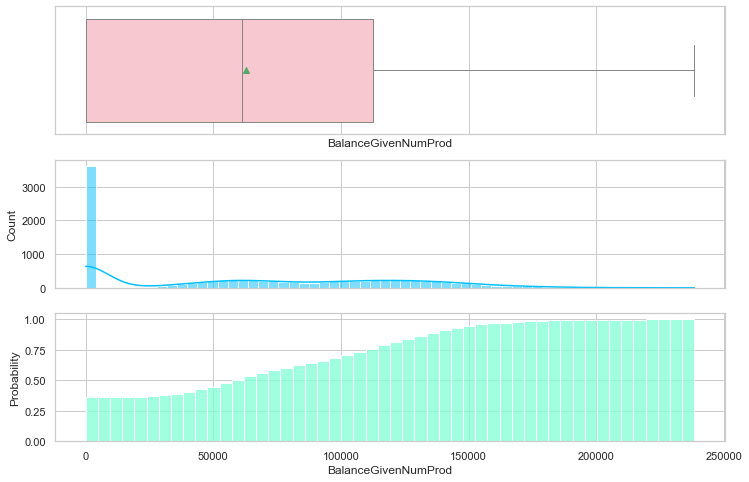

Skew: 0.2776335686267131
Kurtosis (excess kurtosis): -1.222765882126457


In [51]:
df_dummies['BalanceGivenNumProd'] = df_dummies.Balance/df_dummies.NumOfProducts

#Feature to analize
feature='BalanceGivenNumProd'

print("Feature:",feature)
describe=df_dummies[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df_dummies[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df_dummies[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df_dummies[feature] if m < min])

#Counting them
count_min=[m for m in df_dummies[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df_dummies[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df_dummies,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df_dummies[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df_dummies[feature]))

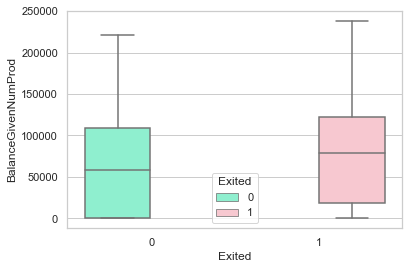

In [52]:
sns.set_theme(style="whitegrid")
sns.set_palette(["aquamarine", "pink"])
sns.boxplot(y='BalanceGivenNumProd',x='Exited',hue='Exited', data=df_dummies);

* The balance, given the number of products, is higher in those who churned. This is a warning.

##### 4.2.4 Has credit card, given the age

Feature: HasCrCardGivenAge

Brief statistical description:

count    10000.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.1
Name: HasCrCardGivenAge, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature HasCrCardGivenAge are: 0.0 0.023809523809523808 0.029411764705882353
Having iqr defined as: q75-q25, for the feature HasCrCardGivenAge the iqr is: 0.029411764705882353

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: -0.044117647058823525 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 0.07352941176470587

Counting outliers below the minimun:
Series([], dtype: int64)

Counting outliers above the maximun:
Series([], dtype: int64)

Graphs:


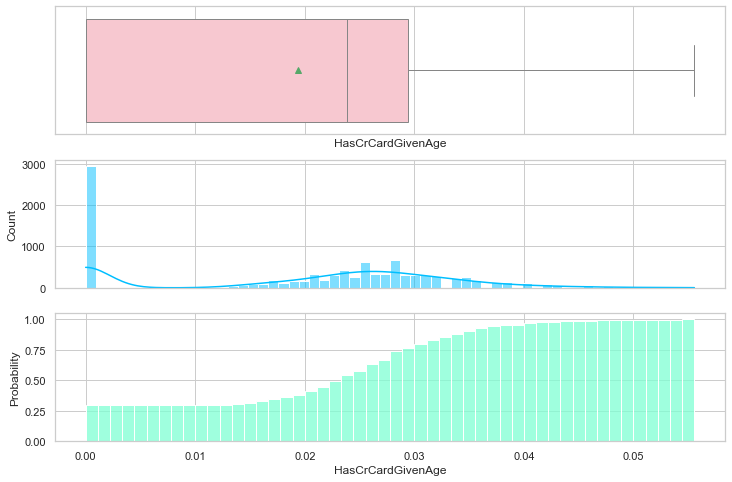

Skew: -0.2891024392530112
Kurtosis (excess kurtosis): -1.0965149739878237


In [53]:
df_dummies['HasCrCardGivenAge'] = df_dummies.HasCrCard/df_dummies.Age

#Feature to analize
feature='HasCrCardGivenAge'

print("Feature:",feature)
describe=df_dummies[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df_dummies[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df_dummies[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df_dummies[feature] if m < min])

#Counting them
count_min=[m for m in df_dummies[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df_dummies[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df_dummies,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df_dummies[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df_dummies[feature]))

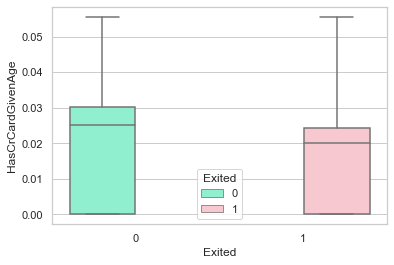

In [54]:
sns.set_theme(style="whitegrid")
sns.set_palette(["aquamarine", "pink"])
sns.boxplot(y='HasCrCardGivenAge',x='Exited',hue='Exited', data=df_dummies);

* The customers who didn't churn, have a higher ratio

##### 4.2.5 Estimated salary, given the age

Feature: SalaryGivenAge

Brief statistical description:

count    10000.0
mean      2751.4
std       1786.7
min          0.3
25%       1315.9
50%       2535.8
75%       3979.2
max      10962.3
Name: SalaryGivenAge, dtype: float64

Looking for outliers:

The q25, q50, q75 quartiles for the feature SalaryGivenAge are: 1315.889645721925 2535.833403805497 3979.2317073170725
Having iqr defined as: q75-q25, for the feature SalaryGivenAge the iqr is: 2663.3420615951472

In this way,
 - the lower limit (q25 minus 1.5 of the iqr) is: -2679.1234466707956 and 
 - the upper limit (q75 pusl 1.5 of the iqr) is: 7974.244799709793

Counting outliers below the minimun:
Series([], dtype: int64)

Counting outliers above the maximun:
8244.048696     1
9146.528421     1
9395.131905     1
8055.078095     1
7977.988947     1
8284.417917     1
8605.346667     1
8063.281667     1
8542.443043     1
8101.841905     1
8556.082609     1
8432.288182     1
8550.804783     1
10962.340556    1
8886.949000     1
9381.9

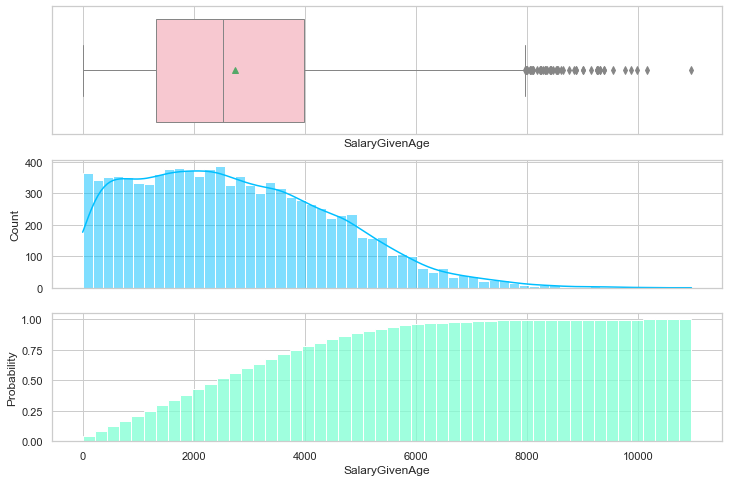

Skew: 0.5762613661185455
Kurtosis (excess kurtosis): -0.082656517640749


In [55]:
df_dummies['SalaryGivenAge'] = df_dummies.EstimatedSalary/df_dummies.Age

#Feature to analize
feature='SalaryGivenAge'

print("Feature:",feature)
describe=df_dummies[feature].describe().round(1)
print("\nBrief statistical description:\n")
print(describe)


#Looking for outliers
print("\nLooking for outliers:")
q25, q50, q75 = np.percentile(df_dummies[feature], [25,50,75])
print("\nThe q25, q50, q75 quartiles for the feature",feature,"are:", q25, q50, q75)
iqr=q75-q25
print("Having iqr defined as: q75-q25, for the feature",feature,"the iqr is:",iqr)

#I calculate the minimum and maximum limits from which a value is considered an outlier
min=q25-1.5*(iqr)
max=q75+1.5*(iqr)
print("\nIn this way,\n - the lower limit (q25 minus 1.5 of the iqr) is:",min,"and","\n - the upper limit (q75 pusl 1.5 of the iqr) is:", max)

#Identify these points
#print("\nRecords above the defined maximum are:",[x for x in df_dummies[feature] if x > max])
#print("Records below the defined minimum are:",[m for m in df_dummies[feature] if m < min])

#Counting them
count_min=[m for m in df_dummies[feature] if m < min]
count_min=pd.Series(count_min)
print("\nCounting outliers below the minimun:")
print(count_min.value_counts())

#Counting them
count_max=[m for m in df_dummies[feature] if m > max]
count_max=pd.Series(count_max)
print("\nCounting outliers above the maximun:")
print(count_max.value_counts())

#Graphs
print("\nGraphs:")
combined_graph(df_dummies,feature)
plt.show()

#Skewness and kurotsis
print("Skew:",skew(df_dummies[feature]))
print("Kurtosis (excess kurtosis):",kurtosis(df_dummies[feature]))

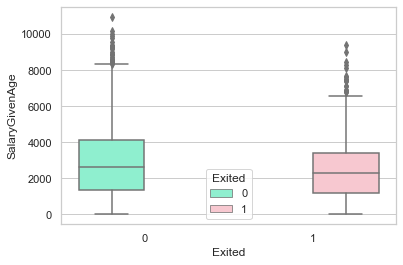

In [56]:
sns.set_theme(style="whitegrid")
sns.set_palette(["aquamarine", "pink"])
sns.boxplot(y='SalaryGivenAge',x='Exited',hue='Exited', data=df_dummies);

* The salary, given the age, is higher for those who didn't churn.

##### 4.2.6 Correlation
Now that we have some new features, let's see the correlation with the target

In [57]:
#Let's see the correlation with the target, ordered by the biggest one to the smallest (in absolute values) 
features_new=list(df_dummies.loc[:,df_dummies.columns!='Exited'])  # everything except "Exited" 
churn=df_dummies['Exited']
correlations_new=df_dummies[features_new].corrwith(churn).round(2)
correlations_new=abs(correlations_new)
correlations_new.sort_values(inplace=True,ascending=False)
correlations_new

Age                    0.29
CreditScoreGivenAge    0.25
Germany                0.17
IsActiveMember         0.16
Balance                0.12
TenureByAge            0.12
Gender                 0.11
BalanceGivenNumProd    0.11
HasCrCardGivenAge      0.11
SalaryGivenAge         0.10
NumOfProducts          0.05
Spain                  0.05
CreditScore            0.03
Tenure                 0.01
HasCrCard              0.01
EstimatedSalary        0.01
dtype: float64

As 'CreditScore', 'Tenure', 'HasCrCard' and 'EstimatedSalary' have a very low correlation (almost next to zero) with the target, I'll drop them. Besides, this features are already included in other new features:
* CreditScoreGivenAge
* TenureByAge
* BalanceGivenNumProd
* HasCrCardGivenAge
* SalaryGivenAge

In [58]:
df_dummies.drop(['CreditScore','Tenure','HasCrCard','EstimatedSalary'], axis=1, inplace= True)
df_dummies.head(10)

,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited,Germany,Spain,TenureByAge,CreditScoreGivenAge,BalanceGivenNumProd,HasCrCardGivenAge,SalaryGivenAge
0,0,42,0.00,1,1,1,0,0,0.047619,14.738095,0.000000,0.023810,2413.068571
1,0,41,83807.86,1,1,0,0,1,0.024390,14.829268,83807.860000,0.000000,2744.940976
2,0,42,159660.80,3,0,1,0,0,0.190476,11.952381,53220.266667,0.023810,2712.656429
3,0,39,0.00,2,0,0,0,0,0.025641,17.923077,0.000000,0.000000,2405.811026
4,0,43,125510.82,1,1,0,0,1,0.046512,19.767442,125510.820000,0.023256,1839.165116
5,1,44,113755.78,2,0,1,0,1,0.181818,14.659091,56877.890000,0.022727,3403.561591
6,1,50,0.00,2,1,0,0,0,0.140000,16.440000,0.000000,0.020000,201.256000
7,0,29,115046.74,4,0,1,1,0,0.137931,12.965517,28761.685000,0.034483,4115.409655
8,1,44,142051.07,2,1,0,0,0,0.090909,11.386364,71025.535000,0.000000,1703.193182
9,1,27,134603.88,1,1,0,0,0,0.074074,25.333333,134603.880000,0.037037,2656.508519


### 4.3 Feature scaling

In [59]:
#I create an object that scales
#To scale, I choose RobustScaler (to take care of the outliers, specially of those which appeared in the created features)
scaler=RobustScaler(quantile_range=(25, 75))

#Fit the inputs, which are the independent variables, but only the numerical features, not the categorical ones.
#So, first, I need to define the categorical features
num_subset=df_dummies[['Age','Balance','NumOfProducts','TenureByAge','CreditScoreGivenAge','BalanceGivenNumProd',
                       'HasCrCardGivenAge','SalaryGivenAge']]
scaler.fit(num_subset)

#I scale the features and save them in a new variable
num_subset_scaled=scaler.transform(num_subset)
num_subset_scaled

array([[ 0.41666667, -0.76148003,  0.        , ..., -0.54295264,
         0.        , -0.04609428],
       [ 0.33333333, -0.10490626,  0.        , ...,  0.20098223,
        -0.80952381,  0.07851322],
       [ 0.41666667,  0.48934648,  2.        , ..., -0.0705338 ,
         0.        ,  0.06639141],
       ...,
       [-0.08333333, -0.76148003,  0.        , ..., -0.54295264,
        -0.80952381, -0.51318587],
       [ 0.41666667, -0.17331945,  1.        , ..., -0.20974319,
         0.        , -0.1217275 ],
       [-0.75      ,  0.25809429,  0.        , ...,  0.6122822 ,
         0.4047619 , -0.44000243]])

In [60]:
#I transform the array into a dataframe, so as to concatenate then and have the entire dataset
num_subset_scaled=DataFrame(num_subset_scaled)
num_subset_scaled= num_subset_scaled.rename(columns={0: 'Age', 
                                                     1: 'Balance',
                                                     2: 'NumOfProducts',
                                                     3: 'TenureByAge',
                                                     4: 'CreditScoreGivenAge',
                                                     5: 'BalanceGivenNumProd',
                                                     6: 'HasCrCardGivenAge',
                                                     7: 'SalaryGivenAge'})
num_subset_scaled.head(3)

,Age,Balance,NumOfProducts,TenureByAge,CreditScoreGivenAge,BalanceGivenNumProd,HasCrCardGivenAge,SalaryGivenAge
0,0.416667,-0.761480,0.0,-0.600907,-0.370690,-0.542953,0.000000,-0.046094
1,0.333333,-0.104906,0.0,-0.772358,-0.357423,0.200982,-0.809524,0.078513
2,0.416667,0.489346,2.0,0.453515,-0.776023,-0.070534,0.000000,0.066391


In [61]:
print("Min:\n",num_subset_scaled.min().round(1))
print("Max:\n",num_subset_scaled.max().round(1))

Min:
 Age                   -1.6
Balance               -0.8
NumOfProducts          0.0
TenureByAge           -1.0
CreditScoreGivenAge   -1.8
BalanceGivenNumProd   -0.5
HasCrCardGivenAge     -0.8
SalaryGivenAge        -1.0
dtype: float64
Max:
 Age                    4.6
Balance                1.2
NumOfProducts          3.0
TenureByAge            3.1
CreditScoreGivenAge    4.3
BalanceGivenNumProd    1.6
HasCrCardGivenAge      1.1
SalaryGivenAge         3.2
dtype: float64


In [62]:
#Now, I need to concatenate this to the original dataframe
#Firs, I define the categorical features
cat_subset=df_dummies[['Gender','IsActiveMember','Germany','Spain','Exited']]
cat_subset

#And finally, I concatenate them, to have the final dataset for the models
df_model=pd.concat([num_subset_scaled,cat_subset], axis=1)
df_model.head(10)

,Age,Balance,NumOfProducts,TenureByAge,CreditScoreGivenAge,BalanceGivenNumProd,HasCrCardGivenAge,SalaryGivenAge,Gender,IsActiveMember,Germany,Spain,Exited
0,0.416667,-0.761480,0.0,-0.600907,-0.370690,-0.542953,0.000000,-0.046094,0,1,0,0,1
1,0.333333,-0.104906,0.0,-0.772358,-0.357423,0.200982,-0.809524,0.078513,0,1,0,1,0
2,0.416667,0.489346,2.0,0.453515,-0.776023,-0.070534,0.000000,0.066391,0,0,0,0,1
3,0.166667,-0.761480,1.0,-0.763126,0.092739,-0.542953,-0.809524,-0.048819,0,0,0,0,0
4,0.500000,0.221806,0.0,-0.609081,0.361102,0.571166,-0.018826,-0.261577,0,1,0,1,0
5,0.583333,0.129714,1.0,0.389610,-0.382185,-0.038066,-0.036797,0.325804,1,0,0,1,1
6,1.083333,-0.761480,1.0,0.080952,-0.123055,-0.542953,-0.129524,-0.876559,1,1,0,0,0
7,-0.666667,0.139828,3.0,0.065681,-0.628607,-0.287645,0.362890,0.593081,0,0,1,0,1
8,0.583333,0.351387,1.0,-0.281385,-0.858381,0.087518,-0.809524,-0.312630,1,1,0,0,0
9,-0.833333,0.293044,0.0,-0.405644,1.170963,0.651882,0.449735,0.045310,1,1,0,0,0


In [63]:
df_model.dtypes

Age                    float64
Balance                float64
NumOfProducts          float64
TenureByAge            float64
CreditScoreGivenAge    float64
BalanceGivenNumProd    float64
HasCrCardGivenAge      float64
SalaryGivenAge         float64
Gender                   uint8
IsActiveMember           int64
Germany                  uint8
Spain                    uint8
Exited                   int64
dtype: object

In [64]:
df_model.shape

(10000, 13)

### 4.4 Defining the target

In [65]:
df.shape

(10000, 10)

In [66]:
#Separate the target variable from the final dataset
x=df_model.drop("Exited", axis=1)
x.head()

,Age,Balance,NumOfProducts,TenureByAge,CreditScoreGivenAge,BalanceGivenNumProd,HasCrCardGivenAge,SalaryGivenAge,Gender,IsActiveMember,Germany,Spain
0,0.416667,-0.761480,0.0,-0.600907,-0.370690,-0.542953,0.000000,-0.046094,0,1,0,0
1,0.333333,-0.104906,0.0,-0.772358,-0.357423,0.200982,-0.809524,0.078513,0,1,0,1
2,0.416667,0.489346,2.0,0.453515,-0.776023,-0.070534,0.000000,0.066391,0,0,0,0
3,0.166667,-0.761480,1.0,-0.763126,0.092739,-0.542953,-0.809524,-0.048819,0,0,0,0
4,0.500000,0.221806,0.0,-0.609081,0.361102,0.571166,-0.018826,-0.261577,0,1,0,1


In [67]:
#Defining the target
y=df_model.Exited
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### 4.6 Train test split

In [68]:
#I keep 30% for test and 70% for train
#I use the parameter stratify=y (target), since the dataset is unbalanced.
#This helps to maintain the proportions in the train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify=y, random_state=42) 

In [69]:
print('Traing set size for x:',x_train.shape)
print('Traing set size for y:',y_train.shape)
print('Test set size for x:',x_test.shape)
print('Test set size for y:',y_test.shape)

Traing set size for x: (7000, 12)
Traing set size for y: (7000,)
Test set size for x: (3000, 12)
Test set size for y: (3000,)


Now check the proportion churn / not churn in the train and test data sets.

In [70]:
y_train.value_counts(normalize=True).sort_index().round(5)

0    0.79629
1    0.20371
Name: Exited, dtype: float64

In [71]:
y_test.value_counts(normalize=True).sort_index().round(5)

0    0.79633
1    0.20367
Name: Exited, dtype: float64

# 5. Classification models

For the prediction, I am going to test between the following models:

5.1 Decision Tree\
5.2 Random Forest\
5.3 Gradient Boosting\
5.4 K Nearest Neighbors\
5.5 Logistic Regression\
5.6 Suport Vector Machine\
5.7 Stochastic gradient descent\
5.8 Gaussian Naive Bayes


Among them, the model with the highest ROC_AUC is the one that will be chosen, so in all cases I will try to maximize that metric.

### 5.1 Desicion tree

For decision trees or random forests models, working with scaled features gives the same result as working with unscaled features. But since for the rest of the models the predictions improve if I scaled variables are used, I will work with them in all cases.

In [72]:
#I look for the parameters that maximize the ROC_AUC
model_basic=DecisionTreeClassifier(random_state=42).fit(x_train, y_train)

#Creating a dictionary grid for grid search
param_grid = {'max_depth':range(1, model_basic.tree_.max_depth+1, 2), 
              'min_samples_leaf':[15,20,25,30],
              'max_features':range(1, len(model_basic.feature_importances_)+1)}

#Creating a dictionary grid for scoring search
scoring = {"AUC": "roc_auc", 
           "F1": make_scorer(f1_score)}


#Fitting grid search to the train data
gridsearch_model_basic = GridSearchCV(estimator=model_basic,
                                   param_grid= param_grid,
                                   cv=StratifiedKFold(), 
                                   n_jobs=-1, 
                                   scoring=scoring,
                                   refit="F1",
                                   verbose=2).fit(x_train, y_train)

Fitting 5 folds for each of 624 candidates, totalling 3120 fits


In [73]:
print("Best parameters: "+str(gridsearch_model_basic.best_params_))
print("Highest score: "+str(gridsearch_model_basic.best_score_)+'\n')

Best parameters: {'max_depth': 11, 'max_features': 7, 'min_samples_leaf': 20}
Highest score: 0.5641885149867416



In [74]:
#I now search the class_weight that maximizes the AUC
model=DecisionTreeClassifier(max_depth=11,
                             max_features=7, 
                             min_samples_leaf=20,
                             random_state=42)

#Setting the range for class weights
weights = np.linspace(0.0,0.99,150)

#Creating a dictionary grid for grid search
param_weights = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Creating a dictionary grid for scoring search
scoring = {"AUC": "roc_auc", 
           "F1": make_scorer(f1_score)}

#Fitting grid search to the train data
gridsearch_model = GridSearchCV(estimator=model,
                                param_grid= param_weights,
                                cv=StratifiedKFold(), 
                                n_jobs=-1, 
                                scoring=scoring,
                                refit="F1",
                                verbose=2).fit(x_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


In [75]:
print("Best parameters: "+str(gridsearch_model.best_params_))
print("Highest score: "+str(gridsearch_model.best_score_)+'\n')

Best parameters: {'class_weight': {0: 0.39865771812080536, 1: 0.6013422818791947}}
Highest score: 0.5859009055593911



In [76]:
#Model
DTC=DecisionTreeClassifier(max_depth=11,
                           max_features=7, 
                           min_samples_leaf=20,
                           class_weight={0: 0.39865771812080536,
                                         1: 0.6013422818791947},
                           random_state=42)

In [77]:
#Training the model
DTC.fit(x_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.39865771812080536,
                                     1: 0.6013422818791947},
                       max_depth=11, max_features=7, min_samples_leaf=20,
                       random_state=42)

In [78]:
#I define a function to use with all models
def measure_error(y_true, y_pred, label):
    return pd.Series({'Accuracy':accuracy_score(y_true, y_pred),
                      'Precision': precision_score(y_true, y_pred),
                      'Recall': recall_score(y_true, y_pred),
                      'F1': f1_score(y_true, y_pred)
                     },
                      name=label)

In [79]:
#Prediction
y_train_pred_dt=DTC.predict(x_train)
y_test_pred_dt=DTC.predict(x_test)

In [80]:
print('Classification report on test (y_test vs y_test_pred)\n')
print(classification_report(y_test, y_test_pred_dt))

print('\nThe error on the training and test data sets:')

# The error on the training and test data sets
train_test_full_error = pd.concat([measure_error(y_train, y_train_pred_dt, 'Train').round(2),
                                   measure_error(y_test, y_test_pred_dt, 'Test').round(2)],
                                  axis=1)

display(train_test_full_error)
print("The ROC_AUC of",DTC, "is\n",metrics.roc_auc_score(y_test, DTC.predict_proba(x_test)[:,1]).round(2))

Classification report on test (y_test vs y_test_pred)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2389
           1       0.58      0.58      0.58       611

    accuracy                           0.83      3000
   macro avg       0.74      0.74      0.74      3000
weighted avg       0.83      0.83      0.83      3000


The error on the training and test data sets:


,Train,Test
Accuracy,0.86,0.83
Precision,0.67,0.58
Recall,0.66,0.58
F1,0.66,0.58


The ROC_AUC of DecisionTreeClassifier(class_weight={0: 0.39865771812080536,
                                     1: 0.6013422818791947},
                       max_depth=11, max_features=7, min_samples_leaf=20,
                       random_state=42) is
 0.81


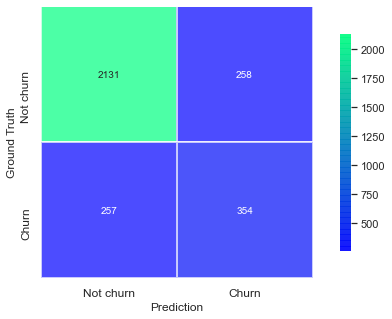

In [81]:
_, ax=plt.subplots(figsize=(10,5))

ax=sns.heatmap(confusion_matrix(y_test, y_test_pred_dt), 
               cbar=True, 
               square=True, 
               annot=True,
               linecolor='white',
               linewidths=1,
               fmt='d',
               annot_kws={'size': 10},
               cbar_kws={"shrink": 0.8},
               alpha=0.7,
               cmap='winter')  


labels = ['Not churn', 'Churn']
ax.set_xticklabels(labels, fontsize=12);
ax.set_yticklabels(labels, fontsize=12);
ax.set_xlabel('Prediction', fontsize=12);
ax.set_ylabel('Ground Truth', fontsize=12);

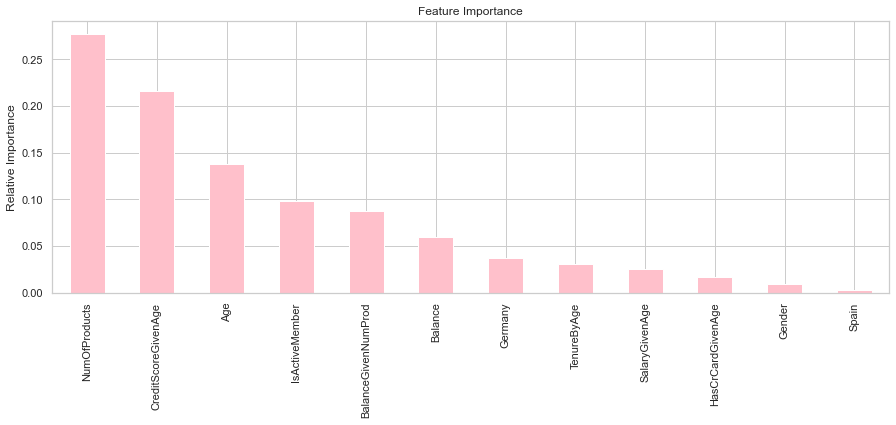

In [82]:
feature_importances=pd.Series(DTC.feature_importances_, index=x.columns).sort_values(ascending=False)

ax = feature_importances.plot(kind='bar', figsize=(15, 5), color='pink')
ax.set(ylabel='Relative Importance')
ax.set(title='Feature Importance');

### 5.2 Random Forest

In [83]:
#I look for the parameters that maximize the ROC_AUC
model_basic=RandomForestClassifier(random_state=42).fit(x_train, y_train)

#Creating a dictionary grid for grid search
param_grid = {'max_depth': [8,9,10,12],
              'min_samples_leaf':[10,20,30],
              'max_features': ['sqrt', 'log2'],
              'n_estimators':[150,200,250]}

#Creating a dictionary grid for scoring search
scoring = {"AUC": "roc_auc", 
           "F1": make_scorer(f1_score)}

#Fitting grid search to the train data
gridsearch_model_basic = GridSearchCV(estimator=model_basic,
                                      param_grid= param_grid,
                                      cv=StratifiedKFold(), 
                                      n_jobs=-1, 
                                      scoring=scoring, 
                                      refit="F1",
                                      verbose=2).fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [84]:
print("Best parameters: "+str(gridsearch_model_basic.best_params_))
print("Highest score: "+str(gridsearch_model_basic.best_score_)+'\n')

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 200}
Highest score: 0.5500472425143432



In [85]:
#I now search the class_weight that maximizes the AUC
model=RandomForestClassifier(max_depth=10, 
                             max_features='sqrt',
                             min_samples_leaf=10, 
                             n_estimators=200,
                             random_state=42)

#Creating a dictionary grid for scoring search
scoring = {"AUC": "roc_auc",
           "F1": make_scorer(f1_score)}

#Setting the range for class weights
weights = np.linspace(0.0,0.99,150)

#Creating a dictionary grid for grid search
param_weights = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data
gridsearch_model = GridSearchCV(estimator=model,
                                param_grid= param_weights,
                                cv=StratifiedKFold(), 
                                n_jobs=-1, 
                                scoring=scoring, 
                                refit="F1",
                                verbose=2).fit(x_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


In [86]:
print("Best parameters: "+str(gridsearch_model.best_params_))
print("Highest score: "+str(gridsearch_model.best_score_)+'\n')

Best parameters: {'class_weight': {0: 0.25248322147651003, 1: 0.74751677852349}}
Highest score: 0.6178114906657827



In [87]:
#Model
RFC=RandomForestClassifier(max_depth=10, 
                           max_features='sqrt',
                           min_samples_leaf=10, 
                           n_estimators=200,
                           class_weight={0: 0.25248322147651003,
                                         1: 0.74751677852349},
                           random_state=42)

#Training the model
print(RFC.fit(x_train, y_train))

#Prediction
y_train_pred_rf=RFC.predict(x_train)
y_test_pred_rf=RFC.predict(x_test)

RandomForestClassifier(class_weight={0: 0.25248322147651003,
                                     1: 0.74751677852349},
                       max_depth=10, max_features='sqrt', min_samples_leaf=10,
                       n_estimators=200, random_state=42)


In [88]:
print('Classification report on test (y_test vs y_test_pred)\n')
print(classification_report(y_test, y_test_pred_rf))

print('\nThe error on the training and test data sets:')

# The error on the training and test data sets
train_test_full_error = pd.concat([measure_error(y_train, y_train_pred_rf, 'Train').round(2),
                                   measure_error(y_test, y_test_pred_rf, 'Test').round(2)],
                                  axis=1)

display(train_test_full_error)
print("The ROC_AUC of",RFC, "is\n",metrics.roc_auc_score(y_test, RFC.predict_proba(x_test)[:,1]).round(2))

Classification report on test (y_test vs y_test_pred)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2389
           1       0.63      0.66      0.64       611

    accuracy                           0.85      3000
   macro avg       0.77      0.78      0.77      3000
weighted avg       0.85      0.85      0.85      3000


The error on the training and test data sets:


,Train,Test
Accuracy,0.88,0.85
Precision,0.71,0.63
Recall,0.73,0.66
F1,0.72,0.64


The ROC_AUC of RandomForestClassifier(class_weight={0: 0.25248322147651003,
                                     1: 0.74751677852349},
                       max_depth=10, max_features='sqrt', min_samples_leaf=10,
                       n_estimators=200, random_state=42) is
 0.88


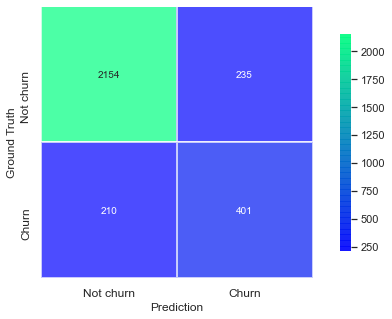

In [89]:
_, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(confusion_matrix(y_test, y_test_pred_rf), 
                 cbar=True, 
                 square=True, 
                 annot=True,
                 linecolor='white',
                 linewidths=1,
                 fmt='d',
                 annot_kws={'size': 10},
                 cbar_kws={"shrink": 0.8},
                 alpha=0.7,
                 cmap='winter')  

labels = ['Not churn', 'Churn']
ax.set_xticklabels(labels, fontsize=12);
ax.set_yticklabels(labels, fontsize=12);
ax.set_xlabel('Prediction', fontsize=12);
ax.set_ylabel('Ground Truth', fontsize=12);

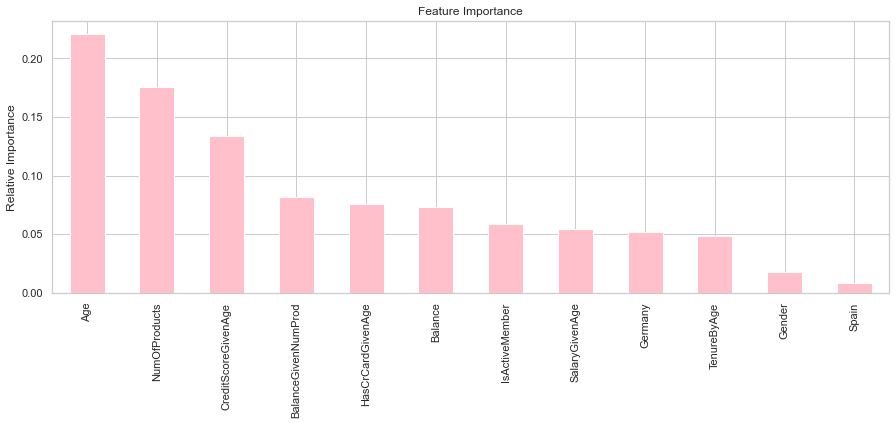

In [90]:
feature_importances=pd.Series(RFC.feature_importances_, index=x.columns).sort_values(ascending=False)

ax = feature_importances.plot(kind='bar', figsize=(15, 5), color='pink')
ax.set(ylabel='Relative Importance')
ax.set(title='Feature Importance');

### 5.3 Gradient Boosting

In [91]:
error_list = list()

# Iterate through various possibilities for number of trees
tree_list = [25,50,100,120,125,150,200]
for n_trees in tree_list:
    
    # Initialize the gradient boost classifier
    model=GradientBoostingClassifier(n_estimators=n_trees, 
                                     random_state=42)

    # Fit the model
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)

    # Get the error
    error = 1.0 - accuracy_score(y_test, y_pred)
    
    # Store it
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))

error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')

error_df.sort_values(by='error')

,error
n_trees,
120.0,0.129000
125.0,0.129333
100.0,0.130333
150.0,0.131667
50.0,0.132333
200.0,0.133667
25.0,0.134667


''

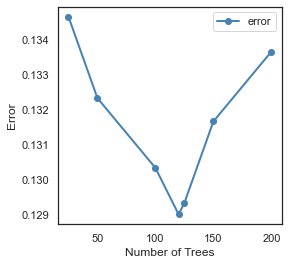

In [92]:
sns.set_style('white')

# Create the plot
ax=error_df.plot(marker='o', figsize=(4,4), linewidth=2,color="steelblue")

# Set parameters
ax.set(xlabel='Number of Trees', ylabel='Error')
;

The optimal number of trees (the one that minimizes the error) is approximately 120.

In [93]:
#I look for the parameters that maximize the ROC_AUC
model_basic=GradientBoostingClassifier(random_state=42,
                                       n_estimators=120).fit(x_train, y_train)

#Creating a dictionary grid for grid search
param_grid = {'learning_rate': [0.5, 0.1, 0.01, 0.001],
              'subsample': [1.0, 0.5],
              'max_features': [5,6,7,8,9]}

#Creating a dictionary grid for scoring search
scoring = {"AUC": "roc_auc", 
           "F1": make_scorer(f1_score)}

#Fitting grid search to the train data
gridsearch_model_basic = GridSearchCV(estimator=model_basic,
                                      param_grid= param_grid,
                                      cv=StratifiedKFold(), 
                                      n_jobs=-1, 
                                      scoring=scoring, 
                                      refit="F1",
                                      verbose=2).fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [94]:
print("Best parameters: "+str(gridsearch_model_basic.best_params_))
print("Highest score: "+str(gridsearch_model_basic.best_score_)+'\n')

Best parameters: {'learning_rate': 0.1, 'max_features': 7, 'subsample': 1.0}
Highest score: 0.5816927040469164



In [95]:
#Model
GBC=GradientBoostingClassifier(max_features=7,
                               learning_rate=0.1,
                               subsample=1.0,
                               n_estimators=120,
                               random_state=42)
#Training the model
print(GBC.fit(x_train, y_train))

#Predition
y_train_pred_gb=GBC.predict(x_train)
y_test_pred_gb=GBC.predict(x_test)

GradientBoostingClassifier(max_features=7, n_estimators=120, random_state=42)


In [96]:
print('Classification report on test (y_test vs y_test_pred)\n')
print(classification_report(y_test, y_test_pred_gb))

print('\nThe error on the training and test data sets:')

# The error on the training and test data sets
train_test_full_error = pd.concat([measure_error(y_train, y_train_pred_gb, 'Train').round(2),
                                   measure_error(y_test, y_test_pred_gb, 'Test').round(2)],
                                  axis=1)

display(train_test_full_error)
print("The ROC_AUC of",GBC, "is\n",metrics.roc_auc_score(y_test, GBC.predict_proba(x_test)[:,1]).round(2))

Classification report on test (y_test vs y_test_pred)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2389
           1       0.79      0.48      0.60       611

    accuracy                           0.87      3000
   macro avg       0.84      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000


The error on the training and test data sets:


,Train,Test
Accuracy,0.88,0.87
Precision,0.82,0.79
Recall,0.50,0.48
F1,0.62,0.60


The ROC_AUC of GradientBoostingClassifier(max_features=7, n_estimators=120, random_state=42) is
 0.88


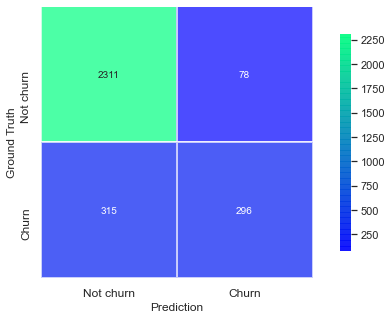

In [97]:
_, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(confusion_matrix(y_test, y_test_pred_gb), 
                 cbar=True, 
                 square=True, 
                 annot=True,
                 linecolor='white',
                 linewidths=1,
                 fmt='d',
                 annot_kws={'size': 10},
                 cbar_kws={"shrink": 0.8},
                 alpha=0.7,
                 cmap='winter')  

labels = ['Not churn', 'Churn']
ax.set_xticklabels(labels, fontsize=12);
ax.set_yticklabels(labels, fontsize=12);
ax.set_xlabel('Prediction', fontsize=12);
ax.set_ylabel('Ground Truth', fontsize=12);

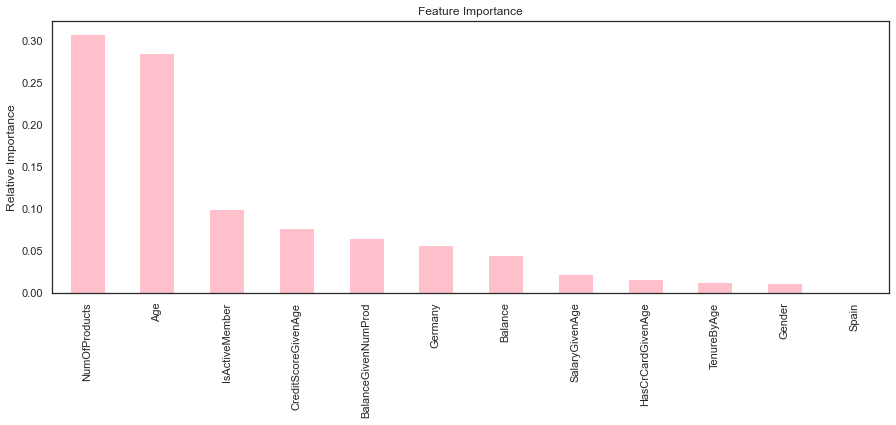

In [98]:
feature_importances=pd.Series(GBC.feature_importances_, index=x.columns).sort_values(ascending=False)

ax = feature_importances.plot(kind='bar', figsize=(15, 5), color='pink')
ax.set(ylabel='Relative Importance')
ax.set(title='Feature Importance');

### 5.4 KNN

In [99]:
#I look for the parameters that maximize the ROC_AUC
model_basic=KNeighborsClassifier()

#Creating a dictionary grid for grid search
param_grid = {'p':[1,2,3,4],
              'n_neighbors':np.arange(1, 10),
              'algorithm': ['ball_tree','kd_tree','brute'],
              'leaf_size':[2,3,4,5]}

#Creating a dictionary grid for scoring search
scoring = {"AUC": "roc_auc", 
           "F1": make_scorer(f1_score)}


#Fitting grid search to the train data
gridsearch_model_basic = GridSearchCV(estimator=model_basic,
                                      param_grid= param_grid,
                                      cv=StratifiedKFold(), 
                                      n_jobs=-1, 
                                      scoring=scoring, 
                                      refit="F1",
                                      verbose=2).fit(x_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


In [100]:
print("Best parameters: "+str(gridsearch_model_basic.best_params_))
print("Highest score: "+str(gridsearch_model_basic.best_score_)+'\n')

Best parameters: {'algorithm': 'ball_tree', 'leaf_size': 2, 'n_neighbors': 5, 'p': 2}
Highest score: 0.5180894479453286



In [101]:
#Model
KNN=KNeighborsClassifier(n_neighbors=5,
                         algorithm='ball_tree',
                         leaf_size=3, 
                         p=2)

#Fiting the model
KNN.fit(x_train, y_train)

#Prediction
y_train_pred_knn=KNN.predict(x_train)
y_test_pred_knn=KNN.predict(x_test)

In [102]:
print('Classification report on test (y_test vs y_test_pred)\n')
print(classification_report(y_test, y_test_pred_knn))

print('\nThe error on the training and test data sets:')

# The error on the training and test data sets
train_test_full_error = pd.concat([measure_error(y_train, y_train_pred_knn, 'Train').round(2),
                                   measure_error(y_test, y_test_pred_knn, 'Test').round(2)],
                                  axis=1)

display(train_test_full_error)
print("The ROC_AUC of",KNN, "is\n",metrics.roc_auc_score(y_test, KNN.predict_proba(x_test)[:,1]).round(2))

Classification report on test (y_test vs y_test_pred)

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      2389
           1       0.67      0.44      0.53       611

    accuracy                           0.84      3000
   macro avg       0.77      0.69      0.72      3000
weighted avg       0.83      0.84      0.83      3000


The error on the training and test data sets:


,Train,Test
Accuracy,0.88,0.84
Precision,0.80,0.67
Recall,0.54,0.44
F1,0.64,0.53


The ROC_AUC of KNeighborsClassifier(algorithm='ball_tree', leaf_size=3) is
 0.8


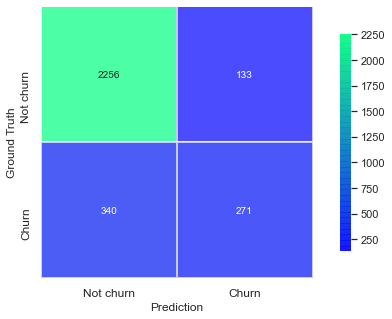

In [103]:
_, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(confusion_matrix(y_test, y_test_pred_knn), 
                 cbar=True, 
                 square=True, 
                 annot=True,
                 linecolor='white',
                 linewidths=1,
                 fmt='d',
                 annot_kws={'size': 10},
                 cbar_kws={"shrink": 0.8},
                 alpha=0.7,
                 cmap='winter')  

labels = ['Not churn', 'Churn']
ax.set_xticklabels(labels, fontsize=12);
ax.set_yticklabels(labels, fontsize=12);
ax.set_xlabel('Prediction', fontsize=12);
ax.set_ylabel('Ground Truth', fontsize=12);

### 5.5 Logistic Reggression

In [104]:
#I look for the parameters that maximize the ROC_AUC
model_basic=LogisticRegression(random_state=42)

#Creating a dictionary grid for grid search
param_grid = {'penalty':['l1','l2','elasticnet','none'], 
              'C':[0.1,0.5,1,2,3],
              'solver':['liblinear','sag','saga']}


#Creating a dictionary grid for scoring search
scoring = {"AUC": "roc_auc", 
           "F1": make_scorer(f1_score)}

#Fitting grid search to the train data
gridsearch_model_basic = GridSearchCV(estimator=model_basic,
                                      param_grid= param_grid,
                                      cv=StratifiedKFold(), 
                                      scoring=scoring, 
                                      refit="F1",
                                      verbose=2).fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1

In [105]:
print("Best parameters: "+str(gridsearch_model_basic.best_params_))
print("Highest score: "+str(gridsearch_model_basic.best_score_)+'\n')

Best parameters: {'C': 0.1, 'penalty': 'none', 'solver': 'sag'}
Highest score: 0.3073833914963052



In [106]:
#I now search the class_weight that maximizes the AUC
model=LogisticRegression(C=0.1, 
                         penalty='none',
                         random_state=42, 
                         solver='sag')

#Creating a dictionary grid for scoring search
scoring = {"AUC": "roc_auc", 
           "F1": make_scorer(f1_score)}

#Setting the range for class weights
weights = np.linspace(0.0,0.99,150)

#Creating a dictionary grid for grid search
param_weights = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data
gridsearch_model= GridSearchCV(estimator=model,
                               param_grid= param_weights,
                               cv=StratifiedKFold(), 
                               n_jobs=-1, 
                               scoring=scoring, 
                               refit="F1",
                               verbose=2).fit(x_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


In [107]:
print("Best parameters: "+str(gridsearch_model.best_params_))
print("Highest score: "+str(gridsearch_model.best_score_)+'\n')

Best parameters: {'class_weight': {0: 0.24583892617449665, 1: 0.7541610738255033}}
Highest score: 0.48838837834088605



In [108]:
#Model
LR=LogisticRegression(C=0.1,
                      penalty='none',
                      class_weight={0: 0.24583892617449665, 
                                    1: 0.7541610738255033},
                      random_state=42, 
                      solver='sag')

#Fiting the model
LR.fit(x_train, y_train)

#Prediction
y_train_pred_lr=LR.predict(x_train)
y_test_pred_lr=LR.predict(x_test)

In [109]:
print('Classification report on test (y_test vs y_test_pred)\n')
print(classification_report(y_test, y_test_pred_lr))

print('\nThe error on the training and test data sets:')
# The error on the training and test data sets
train_test_full_error = pd.concat([measure_error(y_train, y_train_pred_lr, 'Train').round(2),
                                   measure_error(y_test, y_test_pred_lr, 'Test').round(2)],
                                  axis=1)

display(train_test_full_error)
print("The ROC_AUC",LR, "is\n",metrics.roc_auc_score(y_test, LR.predict_proba(x_test)[:,1]).round(2))

Classification report on test (y_test vs y_test_pred)

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      2389
           1       0.43      0.64      0.52       611

    accuracy                           0.76      3000
   macro avg       0.66      0.71      0.68      3000
weighted avg       0.80      0.76      0.77      3000


The error on the training and test data sets:


,Train,Test
Accuracy,0.74,0.76
Precision,0.41,0.43
Recall,0.61,0.64
F1,0.49,0.52


The ROC_AUC LogisticRegression(C=0.1,
                   class_weight={0: 0.24583892617449665, 1: 0.7541610738255033},
                   penalty='none', random_state=42, solver='sag') is
 0.79


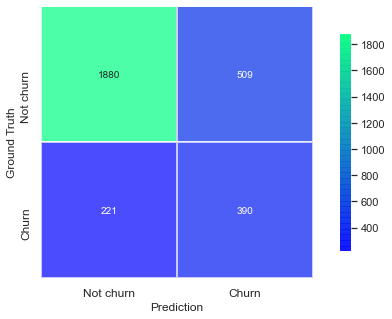

In [110]:
_, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(confusion_matrix(y_test, y_test_pred_lr), 
                 cbar=True, 
                 square=True, 
                 annot=True,
                 linecolor='white',
                 linewidths=1,
                 fmt='d',
                 annot_kws={'size': 10},
                 cbar_kws={"shrink": 0.8},
                 alpha=0.7,
                 cmap='winter')  

labels = ['Not churn', 'Churn']
ax.set_xticklabels(labels, fontsize=12);
ax.set_yticklabels(labels, fontsize=12);
ax.set_xlabel('Prediction', fontsize=12);
ax.set_ylabel('Ground Truth', fontsize=12);

### 5.6 Support vector machine

In [111]:
#I look for the parameters that maximize the ROC_AUC
model_basic=sklearn.svm.SVC(random_state=42, 
                            probability=True)

#Creating a dictionary grid for grid search
param_grid = {'kernel':['rbf','sigmoid'], 
              'C':[1,3,4],
              'gamma':[0.1,0.5,1]}


#Creating a dictionary grid for scoring search
scoring = {"AUC": "roc_auc", 
           "F1": make_scorer(f1_score)}

#Fitting grid search to the train data
gridsearch_model_basic = GridSearchCV(estimator=model_basic, 
                                      param_grid= param_grid,
                                      cv=StratifiedKFold(), 
                                      n_jobs=-1, 
                                      scoring=scoring, 
                                      refit="F1",
                                      verbose=2).fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [112]:
print("Best parameters: "+str(gridsearch_model_basic.best_params_))
print("Highest score: "+str(gridsearch_model_basic.best_score_)+'\n')

Best parameters: {'C': 3, 'gamma': 0.5, 'kernel': 'rbf'}
Highest score: 0.5614729304268838



In [113]:
#I now search the class_weight that maximizes the AUC
model=sklearn.svm.SVC(C=3, 
                      gamma=0.5,
                      probability=True,
                      random_state=42)

#Setting the range for class weights
weights = np.linspace(0.0,0.99,150)

#Creating a dictionary grid for grid search
param_weights = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Creating a dictionary grid for scoring search
scoring = {"AUC": "roc_auc", 
           "F1": make_scorer(f1_score)}

#Fitting grid search to the train data
gridsearch_model=GridSearchCV(estimator=model,
                              param_grid= param_weights,
                              cv=StratifiedKFold(), 
                              n_jobs=-1, 
                              scoring=scoring, 
                              refit="F1",
                              verbose=2).fit(x_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


In [114]:
print("Best parameters: "+str(gridsearch_model.best_params_))
print("Highest score: "+str(gridsearch_model.best_score_)+'\n')

Best parameters: {'class_weight': {0: 0.31228187919463085, 1: 0.6877181208053691}}
Highest score: 0.5943900744065207



In [115]:
#Model
SVM=sklearn.svm.SVC(C=3, 
                    class_weight={0: 0.31228187919463085, 
                                  1: 0.6877181208053691},
                    probability=True,
                    gamma=0.5, 
                    random_state=42)

#Fiting the model
SVM.fit(x_train, y_train)

#Predicción
y_train_pred_svm=SVM.predict(x_train)
y_test_pred_svm=SVM.predict(x_test)

In [116]:
print('Classification report on test (y_test vs y_test_pred)\n')
print(classification_report(y_test, y_test_pred_svm))

print('\nThe error on the training and test data sets:')
# The error on the training and test data sets
train_test_full_error = pd.concat([measure_error(y_train, y_train_pred_svm, 'Train').round(2),
                                   measure_error(y_test, y_test_pred_svm, 'Test').round(2)],
                                  axis=1)

display(train_test_full_error)
print("The ROC_AUC of",SVM, "is\n",metrics.roc_auc_score(y_test, SVM.predict_proba(x_test)[:,1]).round(2))

Classification report on test (y_test vs y_test_pred)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2389
           1       0.63      0.64      0.64       611

    accuracy                           0.85      3000
   macro avg       0.77      0.77      0.77      3000
weighted avg       0.85      0.85      0.85      3000


The error on the training and test data sets:


,Train,Test
Accuracy,0.87,0.85
Precision,0.69,0.63
Recall,0.70,0.64
F1,0.69,0.64


The ROC_AUC of SVC(C=3, class_weight={0: 0.31228187919463085, 1: 0.6877181208053691},
    gamma=0.5, probability=True, random_state=42) is
 0.84


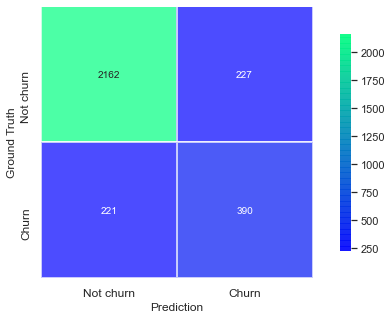

In [117]:
_, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(confusion_matrix(y_test, y_test_pred_svm), 
                 cbar=True, 
                 square=True, 
                 annot=True,
                 linecolor='white',
                 linewidths=1,
                 fmt='d',
                 annot_kws={'size': 10},
                 cbar_kws={"shrink": 0.8},
                 alpha=0.7,
                 cmap='winter')  

labels = ['Not churn', 'Churn']
ax.set_xticklabels(labels, fontsize=12);
ax.set_yticklabels(labels, fontsize=12);
ax.set_xlabel('Prediction', fontsize=12);
ax.set_ylabel('Ground Truth', fontsize=12);

### 5.7 Stochastic gradient descent

In [118]:
#I look for the parameters that maximize the ROC_AUC
model_basic=SGDClassifier(random_state=42)

#Creating a dictionary grid for grid search
param_grid = {'penalty':['l2', 'l1', 'elasticnet'],
              'loss': ['log','modified_huber'],
              'learning_rate':['constant','optimal','invscaling'],
              'eta0':[0.01,0.1,0.15,0.2]}


#Creating a dictionary grid for scoring search
scoring = {"AUC": "roc_auc", 
           "F1": make_scorer(f1_score)}

#Fitting grid search to the train data
gridsearch_model_basic = GridSearchCV(estimator=model_basic, 
                                      param_grid= param_grid,
                                      cv=StratifiedKFold(), 
                                      n_jobs=-1, 
                                      scoring=scoring, 
                                      refit="F1",
                                      verbose=2).fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [119]:
print("Best parameters: "+str(gridsearch_model_basic.best_params_))
print("Highest score: "+str(gridsearch_model_basic.best_score_)+'\n')

Best parameters: {'eta0': 0.01, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'elasticnet'}
Highest score: 0.38399708734589794



In [120]:
#I now search the class_weight that maximizes the AUC
model=SGDClassifier(eta0=0.01, 
                    loss='log',
                    penalty='elasticnet',
                    random_state=42)

#Setting the range for class weights
weights = np.linspace(0.0,0.99,150)

#Creating a dictionary grid for grid search
param_weights = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Creating a dictionary grid for scoring search
scoring = {"AUC": "roc_auc", 
           "F1": make_scorer(f1_score)}

#Fitting grid search to the train data
gridsearch_model=GridSearchCV(estimator=model,
                              param_grid= param_weights,
                              cv=StratifiedKFold(), 
                              n_jobs=-1, 
                              scoring=scoring, 
                              refit="F1",
                              verbose=2).fit(x_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


In [121]:
print("Best parameters: "+str(gridsearch_model.best_params_))
print("Highest score: "+str(gridsearch_model.best_score_)+'\n')

Best parameters: {'class_weight': {0: 0.22590604026845637, 1: 0.7740939597315436}}
Highest score: 0.4809250653508582



In [122]:
#Model
SGDC=SGDClassifier(class_weight={0: 0.22590604026845637, 
                                 1: 0.7740939597315436},
                   eta0=0.01, 
                   penalty='elasticnet', 
                   loss='log', 
                   random_state=42)

#Fiting the model
print(SGDC.fit(x_train, y_train))

#Prediction
y_train_pred_sgd=SGDC.predict(x_train)
y_test_pred_sgd=SGDC.predict(x_test)

SGDClassifier(class_weight={0: 0.22590604026845637, 1: 0.7740939597315436},
              eta0=0.01, loss='log', penalty='elasticnet', random_state=42)


In [123]:
print('Classification report on test (y_test vs y_test_pred)\n')
print(classification_report(y_test, y_test_pred_sgd))

print('\nThe error on the training and test data sets:')
# The error on the training and test data sets
train_test_full_error = pd.concat([measure_error(y_train, y_train_pred_sgd, 'Train').round(2),
                                   measure_error(y_test, y_test_pred_sgd, 'Test').round(2)],
                                  axis=1)

display(train_test_full_error)
print("El AUC del modelo",SGDC, "es\n",metrics.roc_auc_score(y_test, SGDC.predict_proba(x_test)[:,1]).round(2))

Classification report on test (y_test vs y_test_pred)

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      2389
           1       0.41      0.66      0.51       611

    accuracy                           0.74      3000
   macro avg       0.65      0.71      0.66      3000
weighted avg       0.80      0.74      0.76      3000


The error on the training and test data sets:


,Train,Test
Accuracy,0.72,0.74
Precision,0.39,0.41
Recall,0.64,0.66
F1,0.48,0.51


El AUC del modelo SGDClassifier(class_weight={0: 0.22590604026845637, 1: 0.7740939597315436},
              eta0=0.01, loss='log', penalty='elasticnet', random_state=42) es
 0.78


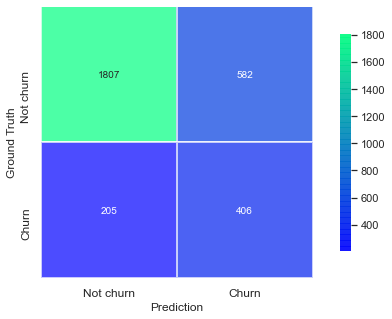

In [124]:
_, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(confusion_matrix(y_test, y_test_pred_sgd), 
                 cbar=True, 
                 square=True, 
                 annot=True,
                 linecolor='white',
                 linewidths=1,
                 fmt='d',
                 annot_kws={'size': 10},
                 cbar_kws={"shrink": 0.8},
                 alpha=0.7,
                 cmap='winter')  

labels = ['Not churn', 'Churn']
ax.set_xticklabels(labels, fontsize=12);
ax.set_yticklabels(labels, fontsize=12);
ax.set_xlabel('Prediction', fontsize=12);
ax.set_ylabel('Ground Truth', fontsize=12);

### 5.8 Gaussian Naive Bayes

In [125]:
#I look for the parameters that maximize the ROC_AUC
model_basic=GaussianNB()

#Creating a dictionary grid for grid search
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}


#Creating a dictionary grid for scoring search
scoring = {"AUC": "roc_auc", 
           "F1": make_scorer(f1_score)}

#Fitting grid search to the train data
gridsearch_model_basic = GridSearchCV(estimator=model_basic, 
                                      param_grid= param_grid,
                                      cv=StratifiedKFold(), 
                                      n_jobs=-1, 
                                      scoring=scoring, 
                                      refit="F1",
                                      verbose=2).fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [126]:
print("Best parameters: "+str(gridsearch_model_basic.best_params_))
print("Highest score: "+str(gridsearch_model_basic.best_score_)+'\n')

Best parameters: {'var_smoothing': 0.001873817422860383}
Highest score: 0.49509004792287825



In [127]:
#Model
GNB=GaussianNB(var_smoothing=0.001873817422860383)

#Fiting the model
print(GNB.fit(x_train, y_train))

#Prediction
y_train_pred_gnb=GNB.predict(x_train)
y_test_pred_gnb=GNB.predict(x_test)

GaussianNB(var_smoothing=0.001873817422860383)


In [128]:
print('Classification report on test (y_test vs y_test_pred)\n')
print(classification_report(y_test, y_test_pred_gnb))

print('\nThe error on the training and test data sets:')
# The error on the training and test data sets
train_test_full_error = pd.concat([measure_error(y_train, y_train_pred_gnb, 'Train').round(2),
                                   measure_error(y_test, y_test_pred_gnb, 'Test').round(2)],
                                  axis=1)

display(train_test_full_error)
print("El AUC del modelo",GNB, "es\n",metrics.roc_auc_score(y_test, GNB.predict_proba(x_test)[:,1]).round(2))

Classification report on test (y_test vs y_test_pred)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2389
           1       0.54      0.55      0.54       611

    accuracy                           0.81      3000
   macro avg       0.71      0.71      0.71      3000
weighted avg       0.81      0.81      0.81      3000


The error on the training and test data sets:


,Train,Test
Accuracy,0.80,0.81
Precision,0.50,0.54
Recall,0.49,0.55
F1,0.49,0.54


El AUC del modelo GaussianNB(var_smoothing=0.001873817422860383) es
 0.81


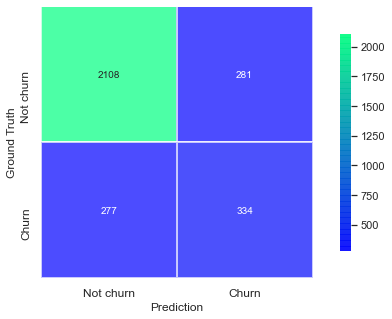

In [129]:
_, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(confusion_matrix(y_test, y_test_pred_gnb), 
                 cbar=True, 
                 square=True, 
                 annot=True,
                 linecolor='white',
                 linewidths=1,
                 fmt='d',
                 annot_kws={'size': 10},
                 cbar_kws={"shrink": 0.8},
                 alpha=0.7,
                 cmap='winter')  

labels = ['Not churn', 'Churn']
ax.set_xticklabels(labels, fontsize=12);
ax.set_yticklabels(labels, fontsize=12);
ax.set_xlabel('Prediction', fontsize=12);
ax.set_ylabel('Ground Truth', fontsize=12);

### 5.9 Voting Classifier

Quote from sklearn
"The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses."

In [130]:
#I choose the best performing models, and create a model with this 2 models (wich are already optimized)
clf1 = RFC
clf2 = GBC

VC = VotingClassifier(estimators=[('Random Forest', clf1), 
                                  ('Gradient Boosting', clf2)],
                      voting='soft')


#scoring = {"AUC": "roc_auc", 
#           "F1": make_scorer(f1_score)}

for clf, label in zip([clf1, clf2, VC], 
                      ['Random Forest', 'Gradient Boosting', 'Ensemble']):
    
    scores = cross_val_score(clf, 
                             x_train, 
                             y_train, 
                             scoring="roc_auc", 
                             cv=StratifiedKFold())
    
    print("ROC_AUC: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), label))

ROC_AUC: 0.8526 (+/- 0.0099) [Random Forest]
ROC_AUC: 0.8577 (+/- 0.0090) [Gradient Boosting]
ROC_AUC: 0.8577 (+/- 0.0099) [Ensemble]


In [131]:
#Fiting the model
print(VC.fit(x_train, y_train))

#Prediction
y_train_pred_vc=VC.predict(x_train)
y_test_pred_vc=VC.predict(x_test)

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(class_weight={0: 0.25248322147651003,
                                                                   1: 0.74751677852349},
                                                     max_depth=10,
                                                     max_features='sqrt',
                                                     min_samples_leaf=10,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('Gradient Boosting',
                              GradientBoostingClassifier(max_features=7,
                                                         n_estimators=120,
                                                         random_state=42))],
                 voting='soft')


In [132]:
print('Classification report on test (y_test vs y_test_pred)\n')
print(classification_report(y_test, y_test_pred_vc))

print('\nThe error on the training and test data sets:')
# The error on the training and test data sets
train_test_full_error = pd.concat([measure_error(y_train, y_train_pred_vc, 'Train').round(2),
                                   measure_error(y_test, y_test_pred_vc, 'Test').round(2)],
                                  axis=1)

display(train_test_full_error)
print("El AUC del modelo",VC, "es\n",metrics.roc_auc_score(y_test, VC.predict_proba(x_test)[:,1]).round(2))

Classification report on test (y_test vs y_test_pred)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2389
           1       0.73      0.56      0.63       611

    accuracy                           0.87      3000
   macro avg       0.81      0.75      0.78      3000
weighted avg       0.86      0.87      0.86      3000


The error on the training and test data sets:


,Train,Test
Accuracy,0.88,0.87
Precision,0.77,0.73
Recall,0.59,0.56
F1,0.67,0.63


El AUC del modelo VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(class_weight={0: 0.25248322147651003,
                                                                   1: 0.74751677852349},
                                                     max_depth=10,
                                                     max_features='sqrt',
                                                     min_samples_leaf=10,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('Gradient Boosting',
                              GradientBoostingClassifier(max_features=7,
                                                         n_estimators=120,
                                                         random_state=42))],
                 voting='soft') es
 0.88


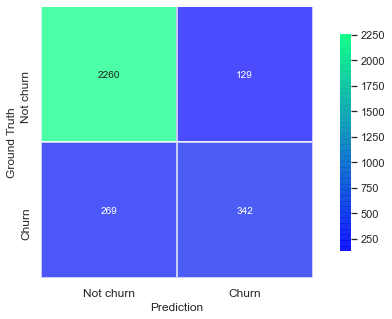

In [133]:
_, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(confusion_matrix(y_test, y_test_pred_vc), 
                 cbar=True, 
                 square=True, 
                 annot=True,
                 linecolor='white',
                 linewidths=1,
                 fmt='d',
                 annot_kws={'size': 10},
                 cbar_kws={"shrink": 0.8},
                 alpha=0.7,
                 cmap='winter')  

labels = ['Not churn', 'Churn']
ax.set_xticklabels(labels, fontsize=12);
ax.set_yticklabels(labels, fontsize=12);
ax.set_xlabel('Prediction', fontsize=12);
ax.set_ylabel('Ground Truth', fontsize=12);

### 5.10 Overview of the models

In [134]:
#Statistics

#Decision Tree 
accuracy_dt_train = accuracy_score(y_train, y_train_pred_dt)
accuracy_dt_test = accuracy_score(y_test, y_test_pred_dt)
recall_dt_train = recall_score(y_train, y_train_pred_dt)
recall_dt_test = recall_score(y_test, y_test_pred_dt)
precision_dt_train = precision_score(y_train, y_train_pred_dt)
precision_dt_test = precision_score(y_test, y_test_pred_dt)
f1_dt_train = f1_score(y_train,y_train_pred_dt)
f1_dt_test = f1_score(y_test,y_test_pred_dt)
AUC_dt = roc_auc_score(y_test, DTC.predict_proba(x_test)[:,1])

#Random Forest 
accuracy_rf_train = accuracy_score(y_train, y_train_pred_rf)
accuracy_rf_test = accuracy_score(y_test, y_test_pred_rf)
recall_rf_train = recall_score(y_train, y_train_pred_rf)
recall_rf_test = recall_score(y_test, y_test_pred_rf)
precision_rf_train = precision_score(y_train, y_train_pred_rf)
precision_rf_test = precision_score(y_test, y_test_pred_rf)
f1_rf_train = f1_score(y_train,y_train_pred_rf)
f1_rf_test = f1_score(y_test,y_test_pred_rf)
AUC_rf = roc_auc_score(y_test, RFC.predict_proba(x_test)[:,1])

#Gradient Boosting
accuracy_gb_train = accuracy_score(y_train, y_train_pred_gb)
accuracy_gb_test = accuracy_score(y_test, y_test_pred_gb)
recall_gb_train = recall_score(y_train, y_train_pred_gb)
recall_gb_test = recall_score(y_test, y_test_pred_gb)
precision_gb_train = precision_score(y_train, y_train_pred_gb)
precision_gb_test = precision_score(y_test, y_test_pred_gb)
f1_gb_train = f1_score(y_train,y_train_pred_gb)
f1_gb_test = f1_score(y_test,y_test_pred_gb)
AUC_gb = roc_auc_score(y_test, GBC.predict_proba(x_test)[:,1])

#KNN 
accuracy_knn_train = accuracy_score(y_train, y_train_pred_knn)
accuracy_knn_test = accuracy_score(y_test, y_test_pred_knn)
recall_knn_train = recall_score(y_train, y_train_pred_knn)
recall_knn_test = recall_score(y_test, y_test_pred_knn)
precision_knn_train = precision_score(y_train, y_train_pred_knn)
precision_knn_test = precision_score(y_test, y_test_pred_knn)
f1_knn_train = f1_score(y_train,y_train_pred_knn)
f1_knn_test = f1_score(y_test,y_test_pred_knn)
AUC_knn = roc_auc_score(y_test, KNN.predict_proba(x_test)[:,1])

#Logistic Regression 
accuracy_lr_train = accuracy_score(y_train, y_train_pred_lr)
accuracy_lr_test = accuracy_score(y_test, y_test_pred_lr)
recall_lr_train = recall_score(y_train, y_train_pred_lr)
recall_lr_test = recall_score(y_test, y_test_pred_lr)
precision_lr_train = precision_score(y_train, y_train_pred_lr)
precision_lr_test = precision_score(y_test, y_test_pred_lr)
f1_lr_train = f1_score(y_train,y_train_pred_lr)
f1_lr_test = f1_score(y_test,y_test_pred_lr)
AUC_lr = roc_auc_score(y_test, LR.predict_proba(x_test)[:,1])

#SVM
accuracy_svm_train = accuracy_score(y_train, y_train_pred_svm)
accuracy_svm_test = accuracy_score(y_test, y_test_pred_svm)
recall_svm_train = recall_score(y_train, y_train_pred_svm)
recall_svm_test = recall_score(y_test, y_test_pred_svm)
precision_svm_train = precision_score(y_train, y_train_pred_svm)
precision_svm_test = precision_score(y_test, y_test_pred_svm)
f1_svm_train = f1_score(y_train,y_train_pred_svm)
f1_svm_test = f1_score(y_test,y_test_pred_svm)
AUC_svm = roc_auc_score(y_test, SVM.predict_proba(x_test)[:,1])

#Stochastic gradient descent
accuracy_sgd_train = accuracy_score(y_train, y_train_pred_sgd)
accuracy_sgd_test = accuracy_score(y_test, y_test_pred_sgd)
recall_sgd_train = recall_score(y_train, y_train_pred_sgd)
recall_sgd_test = recall_score(y_test, y_test_pred_sgd)
precision_sgd_train = precision_score(y_train, y_train_pred_sgd)
precision_sgd_test = precision_score(y_test, y_test_pred_sgd)
f1_sgd_train = f1_score(y_train,y_train_pred_sgd)
f1_sgd_test = f1_score(y_test,y_test_pred_sgd)
AUC_sgd = roc_auc_score(y_test, SGDC.predict_proba(x_test)[:,1])

#Gaussian Naive Bayes
accuracy_gnb_train = accuracy_score(y_train, y_train_pred_gnb)
accuracy_gnb_test = accuracy_score(y_test, y_test_pred_gnb)
recall_gnb_train = recall_score(y_train, y_train_pred_gnb)
recall_gnb_test = recall_score(y_test, y_test_pred_gnb)
precision_gnb_train = precision_score(y_train, y_train_pred_gnb)
precision_gnb_test = precision_score(y_test, y_test_pred_gnb)
f1_gnb_train = f1_score(y_train,y_train_pred_gnb)
f1_gnb_test = f1_score(y_test,y_test_pred_gnb)
AUC_gnb = roc_auc_score(y_test, GNB.predict_proba(x_test)[:,1])

#Voting Classifier
accuracy_vc_train = accuracy_score(y_train, y_train_pred_vc)
accuracy_vc_test = accuracy_score(y_test, y_test_pred_vc)
recall_vc_train = recall_score(y_train, y_train_pred_vc)
recall_vc_test = recall_score(y_test, y_test_pred_vc)
precision_vc_train = precision_score(y_train, y_train_pred_vc)
precision_vc_test = precision_score(y_test, y_test_pred_vc)
f1_vc_train = f1_score(y_train,y_train_pred_vc)
f1_vc_test = f1_score(y_test,y_test_pred_vc)
AUC_vc = roc_auc_score(y_test, VC.predict_proba(x_test)[:,1])

#Dataframe
statistics_comparision_df = pd.DataFrame()

statistics_comparision_df["Model"] = ["Decision Tree","Random Forest","Gradient Boosting","KNN","Logistic Reggression",
                                      "SVM", "Stochastic gradient descent","Gaussian Naive Bayes", "Ensemble - RFC y GBC"]

statistics_comparision_df["Accuracy Test"] = [accuracy_dt_test,accuracy_rf_test,accuracy_gb_test,
                                              accuracy_knn_test,accuracy_lr_test,accuracy_svm_test,
                                              accuracy_sgd_test,accuracy_gnb_test,accuracy_vc_test]

statistics_comparision_df["Accuracy Train"] = [accuracy_dt_train,accuracy_rf_train,accuracy_gb_train,
                                               accuracy_knn_train,accuracy_lr_train,accuracy_svm_train,
                                               accuracy_sgd_train,accuracy_gnb_train,accuracy_vc_train] 

statistics_comparision_df["Precision Test"] = [precision_dt_test,precision_rf_test,precision_gb_test,
                                               precision_knn_test,precision_lr_test,precision_svm_test,
                                               precision_sgd_test,precision_gnb_test,precision_vc_test]


statistics_comparision_df["Precision Train"] = [precision_dt_train,precision_rf_train,precision_gb_train,
                                                precision_knn_train,precision_lr_train,precision_svm_train,
                                                precision_sgd_train,precision_gnb_train,precision_vc_train]


statistics_comparision_df["Recall Test"] = [recall_dt_test,recall_rf_test,recall_gb_test,
                                            recall_knn_test,recall_lr_test,recall_svm_test,
                                            recall_sgd_test,recall_gnb_test,recall_vc_test]


statistics_comparision_df["Recall Train"] = [recall_dt_train,recall_rf_train,recall_gb_train,
                                             recall_knn_train,recall_lr_train,recall_svm_train,
                                             recall_sgd_train,recall_gnb_train,recall_vc_train]


statistics_comparision_df["F1 Score Test"] = [f1_dt_test,f1_rf_test,f1_gb_test,
                                              f1_knn_test,f1_lr_test,f1_svm_test,
                                              f1_sgd_test,f1_gnb_test,f1_vc_test]


statistics_comparision_df["F1 Score Train"] = [f1_dt_train,f1_rf_train,f1_gb_train,
                                               f1_knn_train,f1_lr_train,f1_svm_train,
                                               f1_sgd_train,f1_gnb_train,f1_vc_train]


statistics_comparision_df["AUC"] = [AUC_dt, AUC_rf, AUC_gb, AUC_knn, AUC_lr, AUC_svm, AUC_sgd, AUC_gnb, AUC_vc]

statistics_comparision_df.sort_values('AUC',ascending=False).round(4)

,Model,Accuracy Test,Accuracy Train,Precision Test,Precision Train,Recall Test,Recall Train,F1 Score Test,F1 Score Train,AUC
8,Ensemble - RFC y GBC,0.8673,0.8814,0.7261,0.7709,0.5597,0.5947,0.6322,0.6714,0.8816
2,Gradient Boosting,0.8690,0.8761,0.7914,0.8239,0.4845,0.4986,0.6010,0.6212,0.8795
1,Random Forest,0.8517,0.8829,0.6305,0.7067,0.6563,0.7265,0.6431,0.7165,0.8773
5,SVM,0.8507,0.8741,0.6321,0.6868,0.6383,0.7027,0.6352,0.6946,0.8418
0,Decision Tree,0.8283,0.8643,0.5784,0.6705,0.5794,0.6564,0.5789,0.6634,0.8137
7,Gaussian Naive Bayes,0.8140,0.7953,0.5431,0.4975,0.5466,0.4881,0.5449,0.4927,0.8109
3,KNN,0.8423,0.8776,0.6708,0.7973,0.4435,0.5351,0.5340,0.6404,0.7956
4,Logistic Reggression,0.7567,0.7430,0.4338,0.4117,0.6383,0.6094,0.5166,0.4914,0.7921
6,Stochastic gradient descent,0.7377,0.7210,0.4109,0.3878,0.6645,0.6388,0.5078,0.4826,0.7785


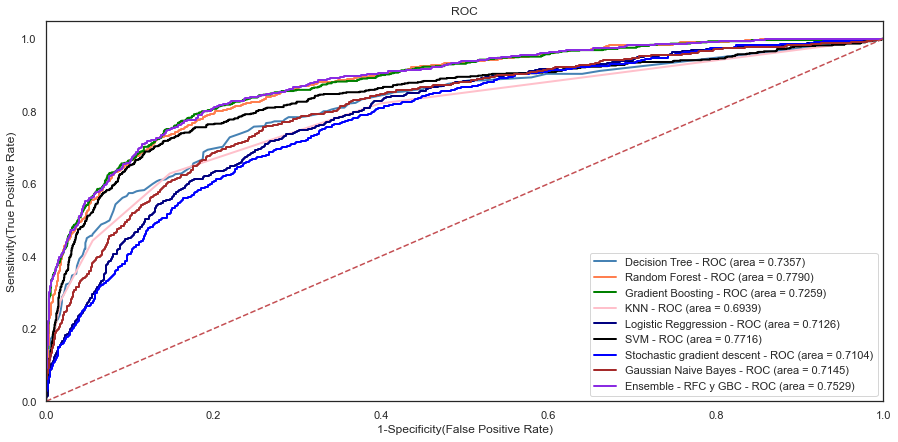

In [135]:
#ROC curve
plt.figure(figsize=(15, 7))

sns.set_theme(style="white")
sns.set_palette(["steelblue", "coral","green","pink","navy","black","blue","brown","blueviolet"])


# Add the models to the list that you want to view on the ROC plot

models =[
{'label': 'Decision Tree',
'model': DTC,},

{'label': 'Random Forest',
'model': RFC,},

{'label': 'Gradient Boosting',
'model': GBC,},

{'label': 'KNN',
'model': KNN,},
    
{'label': 'Logistic Reggression',
'model': LR,},
    
{'label': 'SVM',
'model': SVM,},

{'label': 'Stochastic gradient descent',
'model': SGDC},

{'label': 'Gaussian Naive Bayes',
'model': GNB},

{'label': 'Ensemble - RFC y GBC',
'model': VC}
    
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data

# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])

# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))

# Now, plot the computed values
    plt.plot(fpr, 
             tpr, 
             label='%s - ROC (area = %0.4f)' % (m['label'], auc),
             linewidth=2)

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()  

# 6. CONCLUTIONS
The model chosen for the prediction is the one which was ensembled, mixing the best qualities of the Random Forest and Gradient Boosting models. The ROC_AUC score of this ensembled model is 88,16%, with 86.73% of accuracy

Let's check the model with the entire dataset

In [136]:
df_check= df_model.copy()
del df_check['Exited']

In [137]:
final_model = VC
final_model.fit(x_train, y_train)

y_pred = final_model.predict(x_test)
y_prob = final_model.predict_proba(x_test)

print("Classification report:\n", classification_report(y_test, y_pred, digits=4))
 
# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test,y_prob[:,1])))

Classification report:
               precision    recall  f1-score   support

           0     0.8936    0.9460    0.9191      2389
           1     0.7261    0.5597    0.6322       611

    accuracy                         0.8673      3000
   macro avg     0.8099    0.7529    0.7756      3000
weighted avg     0.8595    0.8673    0.8606      3000

AUC: 0.8816



In [138]:
pred=final_model.predict(df_check)
predicted=pd.DataFrame()
predicted['predicted']=pred

In [139]:
predicted.value_counts()

predicted
0            8429
1            1571
dtype: int64

In [140]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

The model predicted that 1571 customers will churn, while, in fact, 2037 did really churned. That's a difference of 466 customers, wich represents 4.66% of the total.